# <u> Name :</u> ADVAIT GURUNATH CHAVAN
# <u> Email id :</u> advaitchavan135@gmail.com
# CDAC PGDAI DEEP LEARNING ASSIGNMENT__1

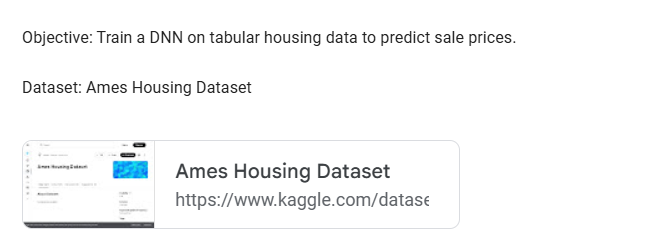

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")

print("Path to dataset files:", path)

100%|██████████| 185k/185k [00:00<00:00, 704kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prevek18/ames-housing-dataset/versions/1


In [3]:
path

'/root/.cache/kagglehub/datasets/prevek18/ames-housing-dataset/versions/1'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1. Load the dataset

In [6]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/prevek18/ames-housing-dataset/versions/1/AmesHousing.csv')

In [7]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 2. Analyzing Missing Values

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

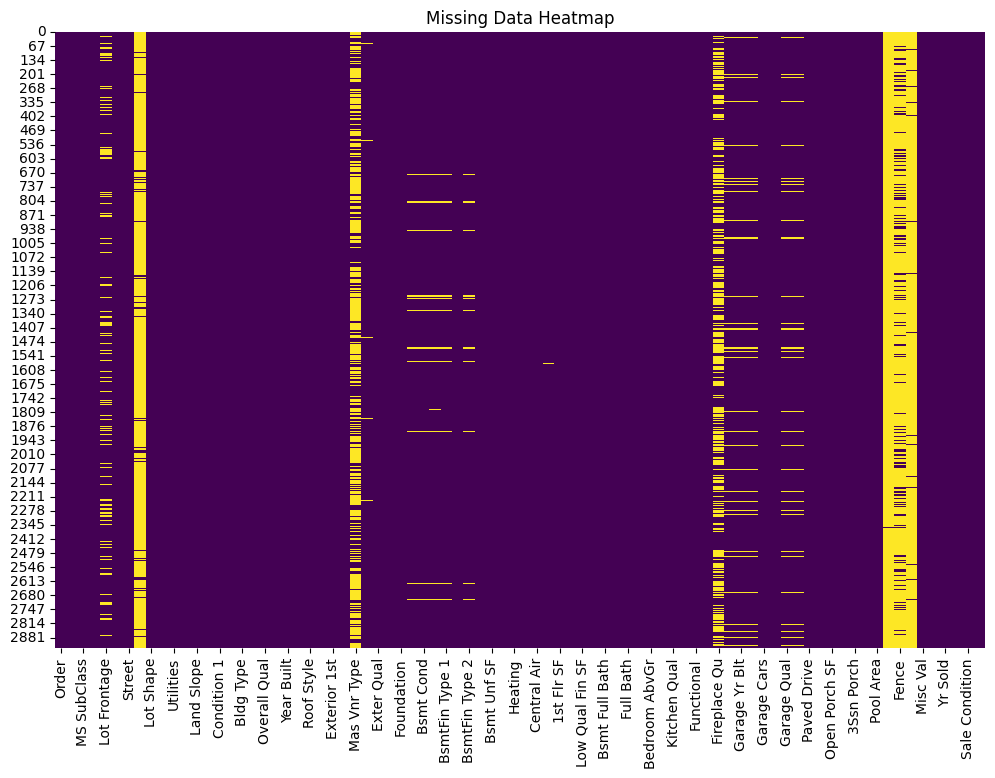

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [12]:
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
dtype: int64


In [15]:
# Calculate missing values per column
missing_counts = df.isnull().sum()
missing_percentage = missing_counts / len(df)

# Drop columns where more than 50% of the data is missing
cols_to_drop = missing_percentage[missing_percentage > 0.5].index
df_clean = df.drop(columns=cols_to_drop)

In [16]:
print("Dropped columns due to high missing percentage:")
print(list(cols_to_drop))
print("\nRemaining columns:", df_clean.columns.tolist())

Dropped columns due to high missing percentage:
['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']

Remaining columns: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt'

In [17]:
# Separate numerical and categorical columns
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

In [18]:
# Fill missing values
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

<ipython-input-18-21493b0e107a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
<ipython-input-18-21493b0e107a>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [19]:
# Verify that missing values have been handled
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum().sort_values(ascending=False))


Missing values after cleaning:
Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64


In [22]:
df_clean.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## 3. Exploratory Data Analysis (EDA)

### A. Visualizing Missing Data (Post-Cleaning)

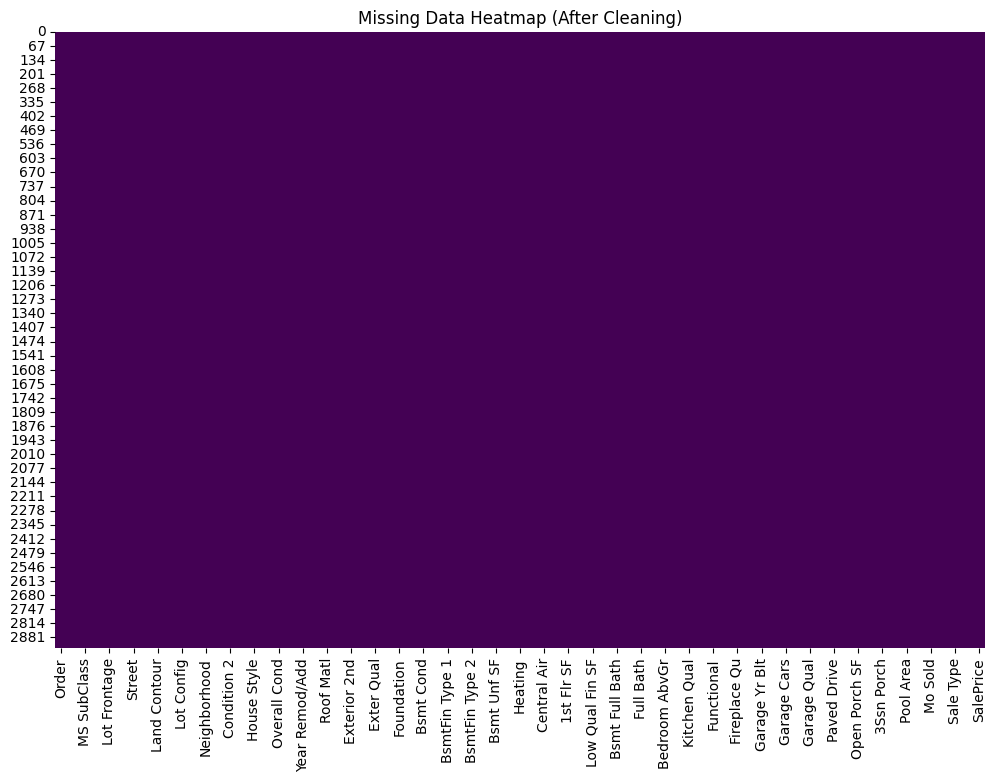

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap (After Cleaning)")
plt.show()

### B. Univariate Analysis

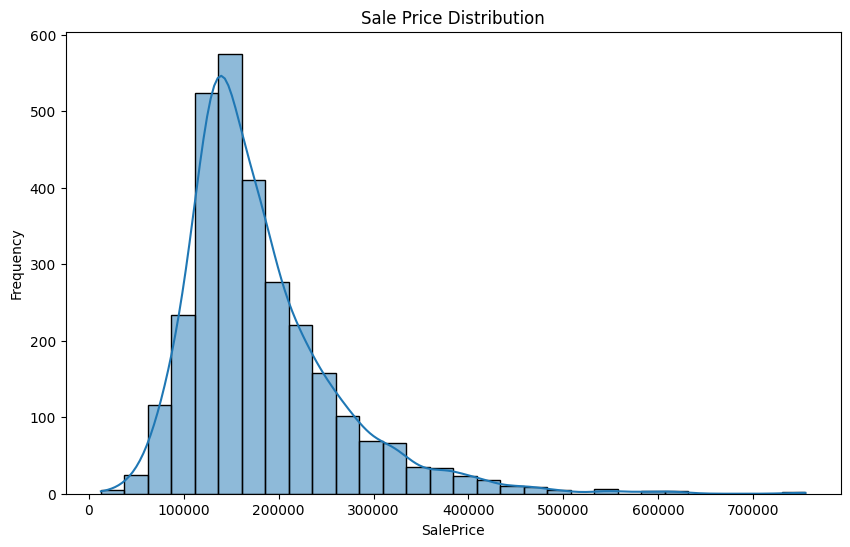

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['SalePrice'], kde=True, bins=30)
plt.title("Sale Price Distribution")
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


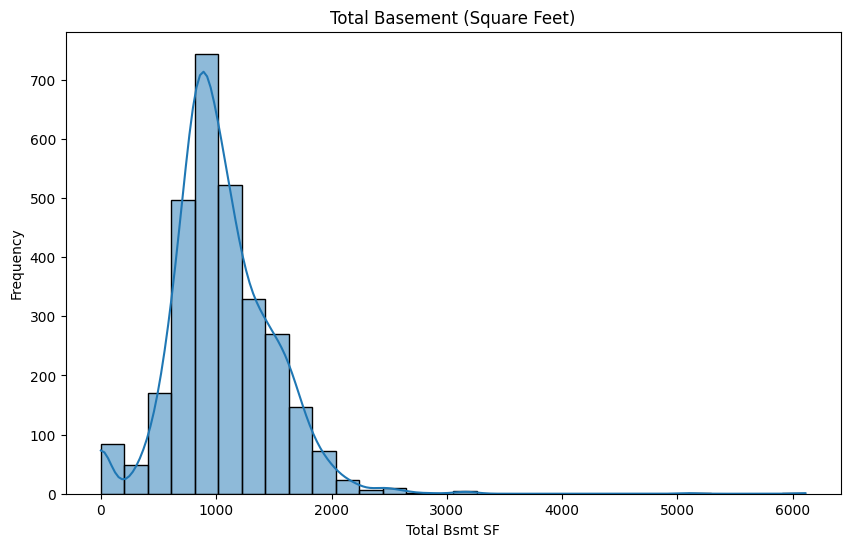

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Total Bsmt SF'], kde=True, bins=30)
plt.title("Total Basement (Square Feet)")
plt.xlabel("Total Bsmt SF")
plt.ylabel("Frequency")
plt.show()


### C. Correlation Analysis

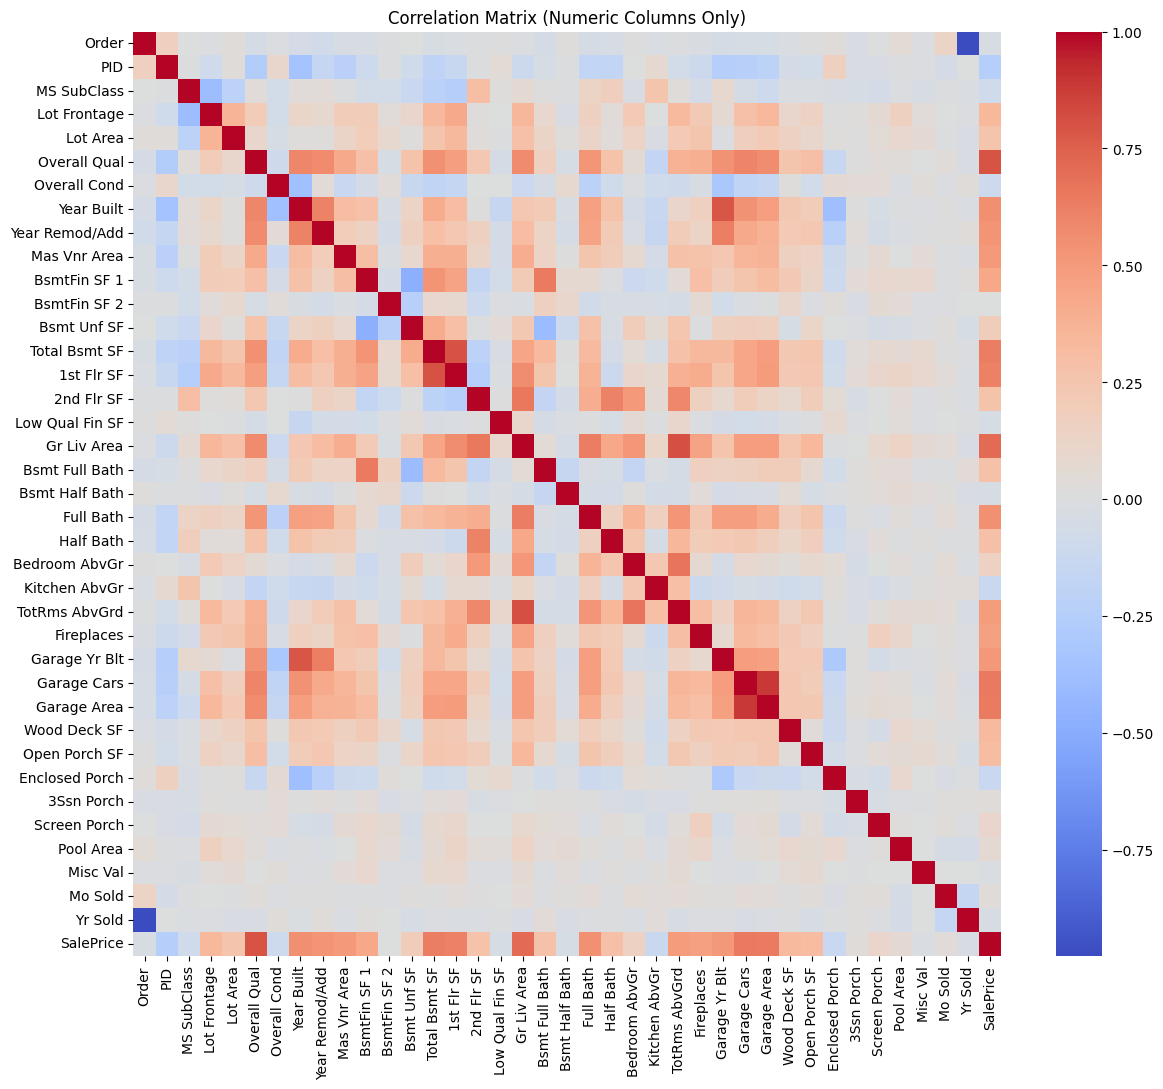

Top 10 features correlated with SalePrice:
 Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647812
Garage Area       0.640381
Total Bsmt SF     0.632164
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.508882
Name: SalePrice, dtype: float64


<ipython-input-27-f6a3000ccbbc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target[top_features], y=top_features, palette='viridis')


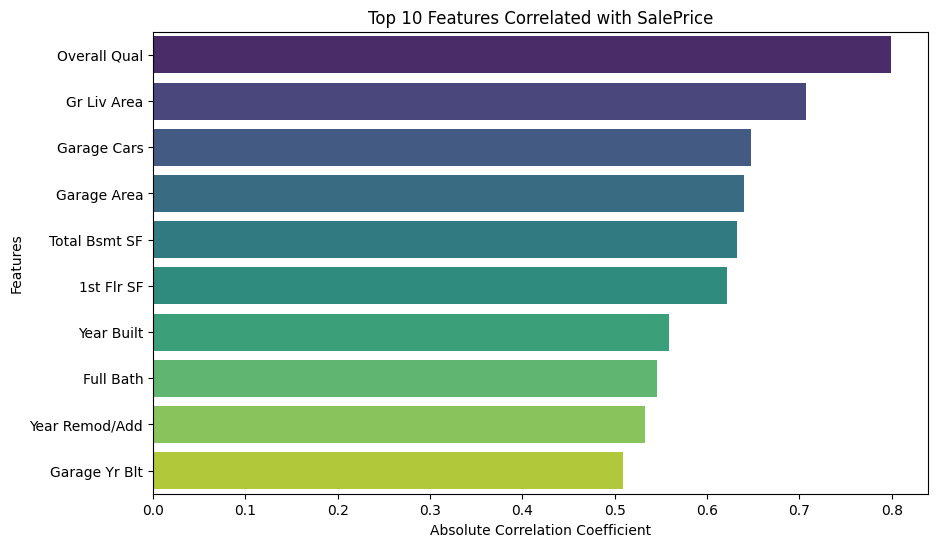

In [27]:
# Only select columns with numeric data for correlation analysis
import numpy as np
numeric_df = df_clean.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

# Identify top 10 features most correlated with SalePrice
corr_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
top_features = corr_target.index[1:11]  # Exclude SalePrice itself
print("Top 10 features correlated with SalePrice:\n", corr_target[top_features])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target[top_features], y=top_features, palette='viridis')
plt.title("Top 10 Features Correlated with SalePrice")
plt.xlabel("Absolute Correlation Coefficient")
plt.ylabel("Features")
plt.show()


### D. Categorical Analysis

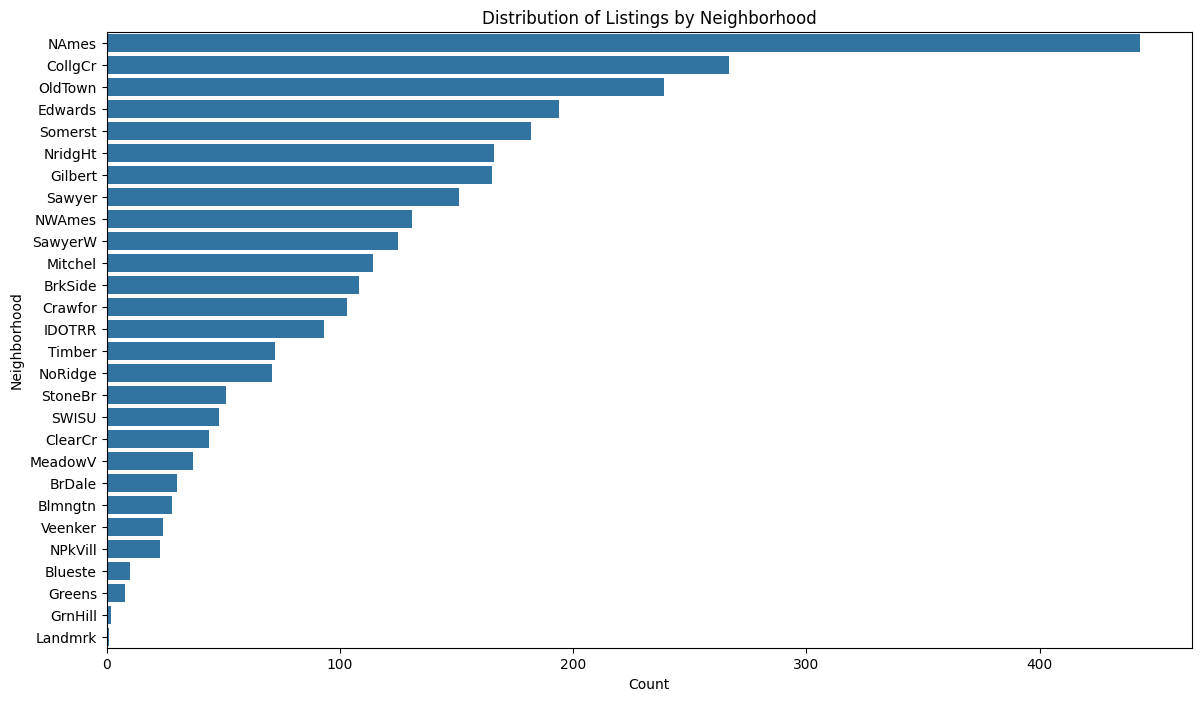

Average SalePrice by Neighborhood:
 Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246599.541667
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Blmngtn    196661.678571
Greens     193531.250000
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
Mitchel    162226.631579
NAmes      145097.349887
Blueste    143590.000000
NPkVill    140710.869565
Landmrk    137000.000000
Sawyer     136751.152318
SWISU      135071.937500
Edwards    130843.381443
BrkSide    124756.250000
OldTown    123991.891213
BrDale     105608.333333
IDOTRR     103752.903226
MeadowV     95756.486486
Name: SalePrice, dtype: float64


In [28]:
if 'Neighborhood' in df_clean.columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Neighborhood', data=df_clean, order=df_clean['Neighborhood'].value_counts().index)
    plt.title("Distribution of Listings by Neighborhood")
    plt.xlabel("Count")
    plt.ylabel("Neighborhood")
    plt.show()

    # Average SalePrice by Neighborhood
    neighborhood_prices = df_clean.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
    print("Average SalePrice by Neighborhood:\n", neighborhood_prices)


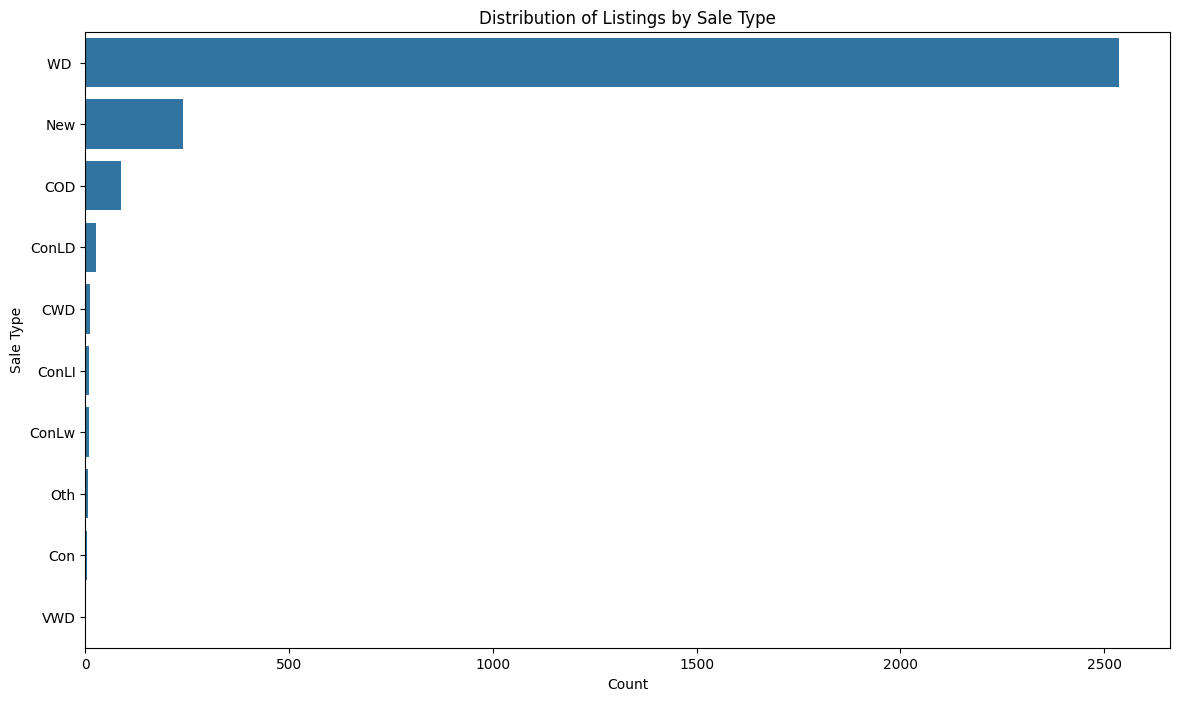

Average SalePrice by Sale Type:
 Sale Type
New      275751.309623
Con      224446.000000
CWD      184237.500000
ConLI    180105.555556
WD       174361.935331
VWD      137000.000000
COD      132248.287356
ConLD    125748.192308
ConLw    121937.500000
Oth      114920.142857
Name: SalePrice, dtype: float64


In [29]:
if 'Sale Type' in df_clean.columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Sale Type', data=df_clean, order=df_clean['Sale Type'].value_counts().index)
    plt.title("Distribution of Listings by Sale Type")
    plt.xlabel("Count")
    plt.ylabel("Sale Type")
    plt.show()

    # Average SalePrice by Sale Type
    Sale_Type_prices = df_clean.groupby('Sale Type')['SalePrice'].mean().sort_values(ascending=False)
    print("Average SalePrice by Sale Type:\n", Sale_Type_prices)


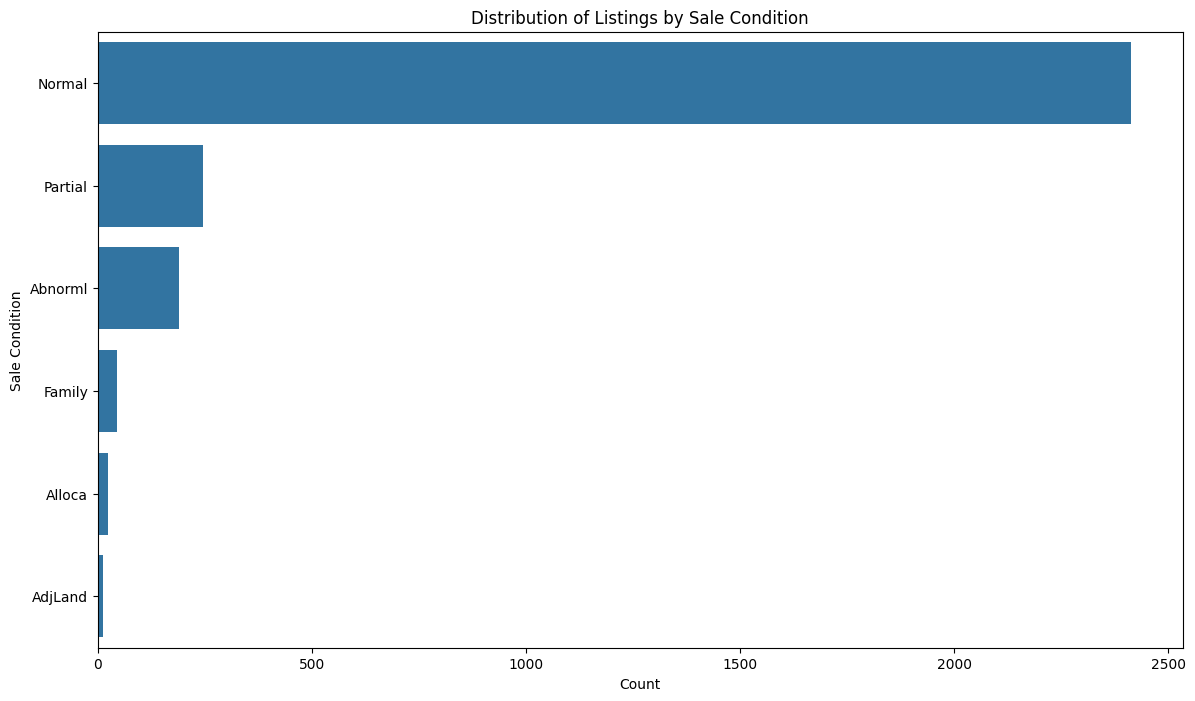

In [31]:
if 'Sale Condition' in df_clean.columns:
    plt.figure(figsize=(14, 8))
    sns.countplot(y='Sale Condition', data=df_clean, order=df_clean['Sale Condition'].value_counts().index)
    plt.title("Distribution of Listings by Sale Condition")
    plt.xlabel("Count")
    plt.ylabel("Sale Condition")
    plt.show()



Analyzing categorical column: MS Zoning


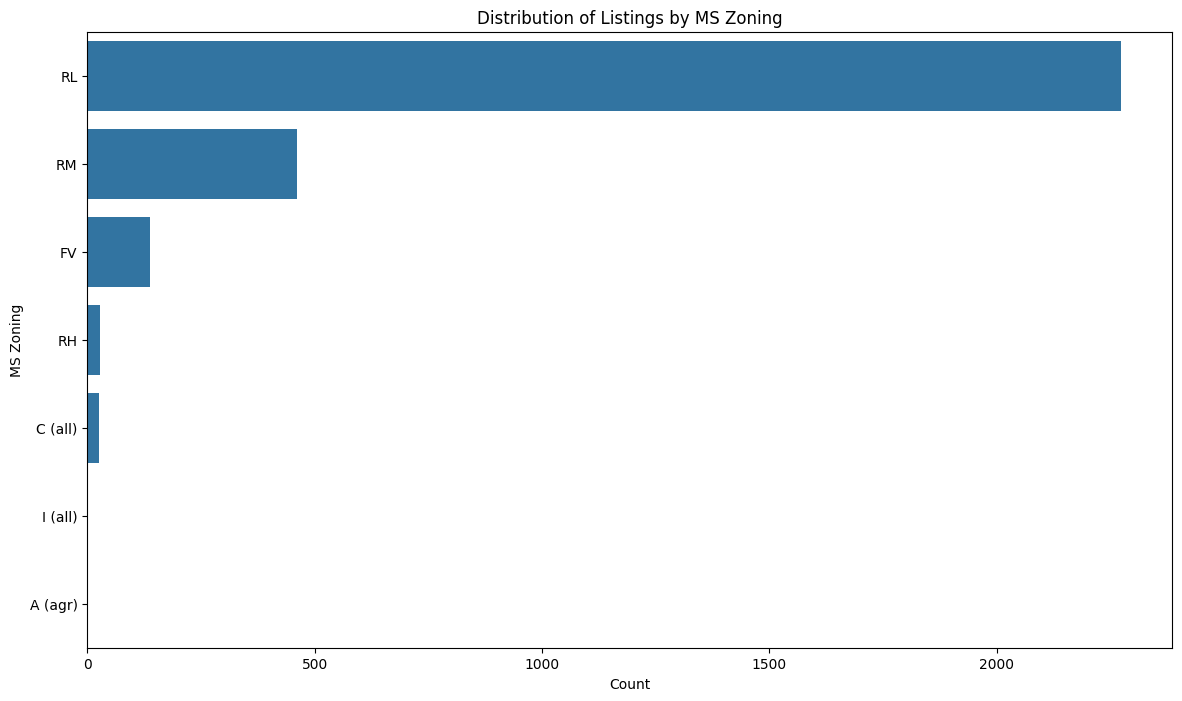

Average SalePrice by MS Zoning:
MS Zoning
FV         218986.949640
RL         191283.251650
RH         136419.777778
RM         126781.393939
I (all)     80312.500000
C (all)     79795.040000
A (agr)     47300.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Street


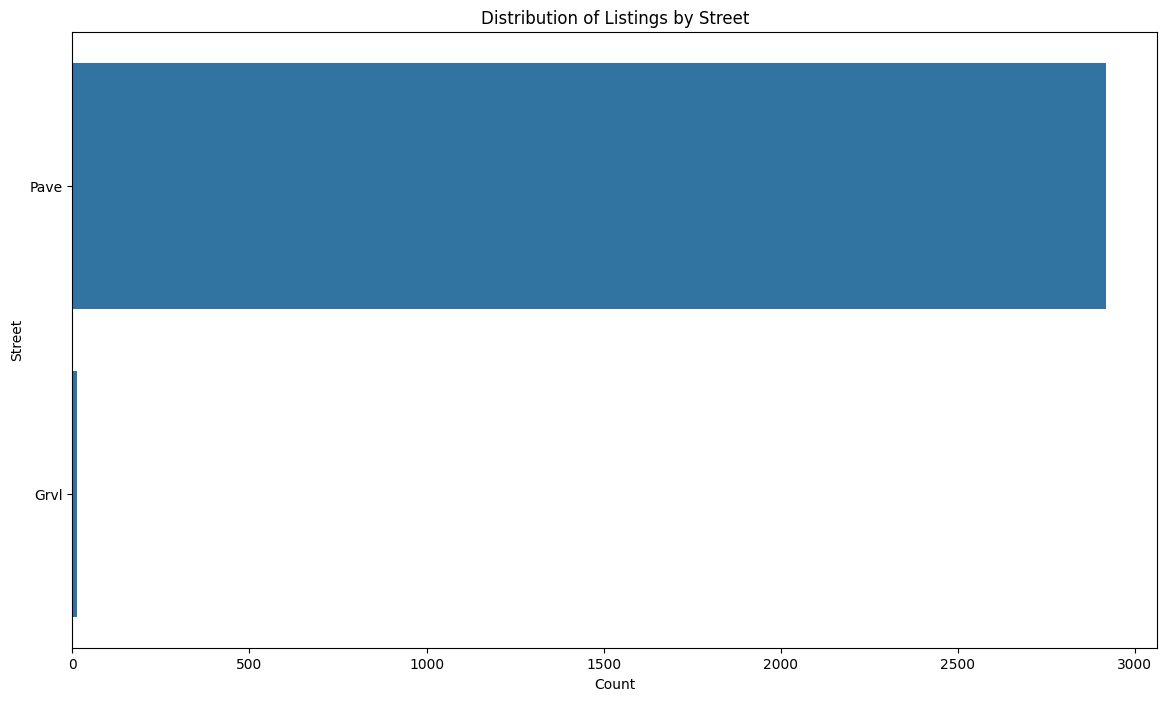

Average SalePrice by Street:
Street
Pave    181100.923920
Grvl    106663.333333
Name: SalePrice, dtype: float64

Analyzing categorical column: Lot Shape


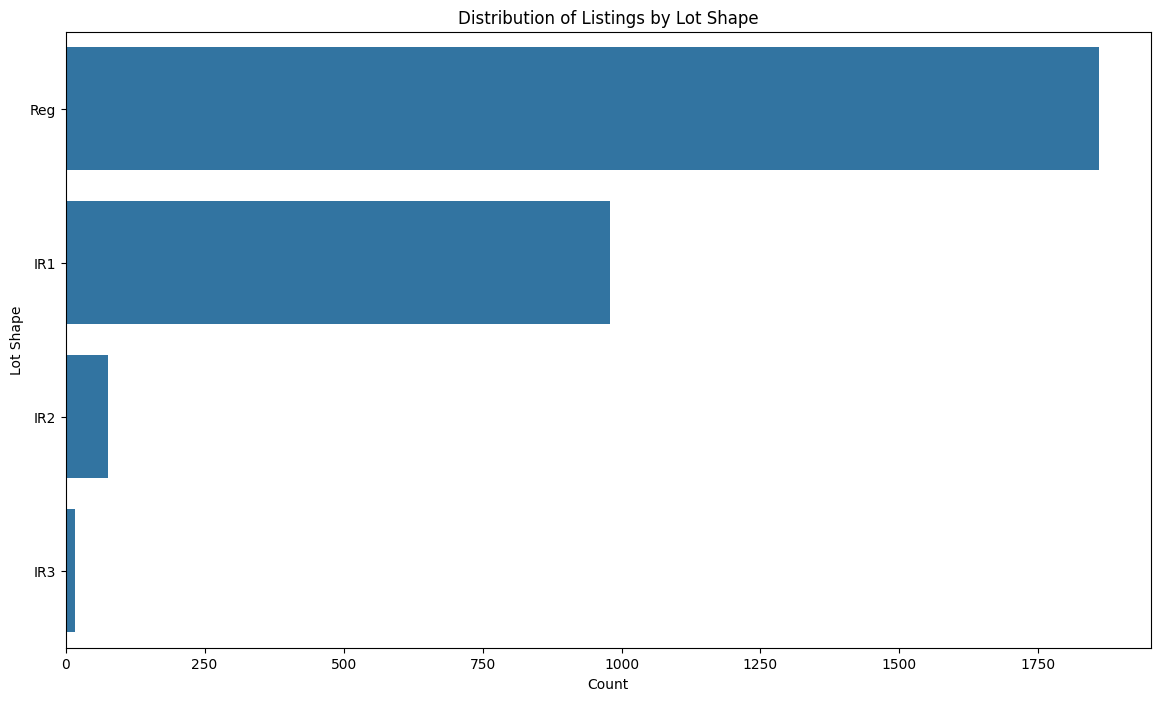

Average SalePrice by Lot Shape:
Lot Shape
IR2    229588.355263
IR3    221922.812500
IR1    210925.348315
Reg    162580.451856
Name: SalePrice, dtype: float64

Analyzing categorical column: Land Contour


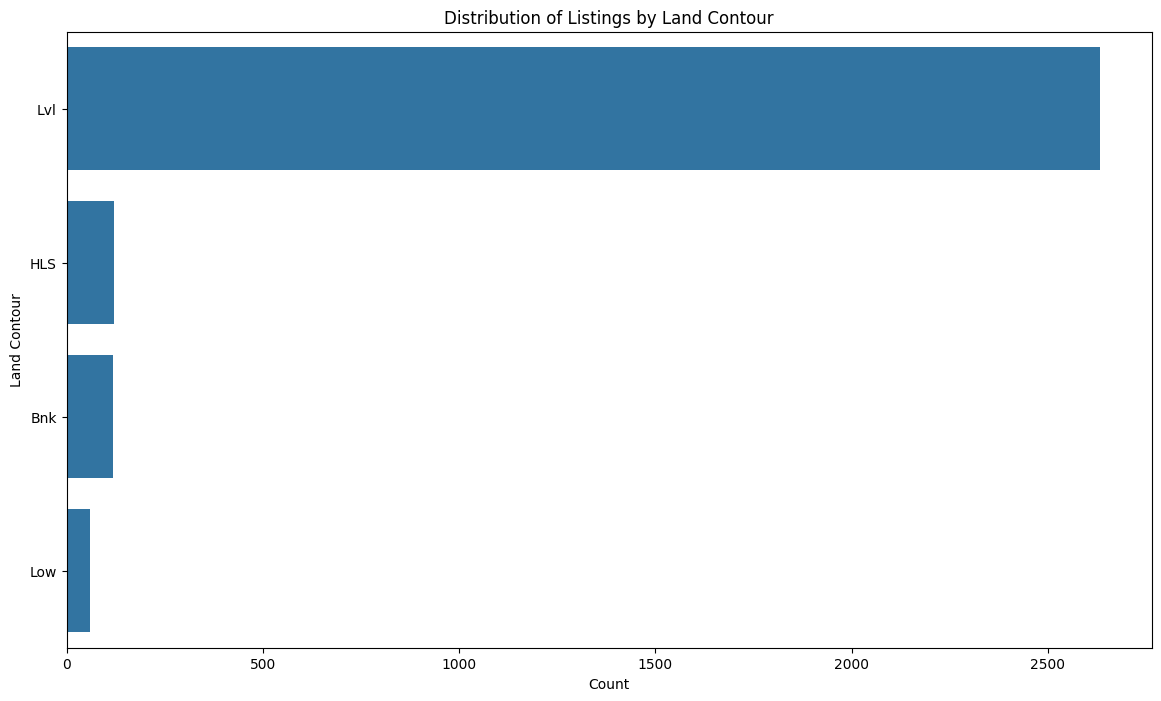

Average SalePrice by Land Contour:
Land Contour
HLS    253924.525000
Low    194882.733333
Lvl    178743.737942
Bnk    144754.589744
Name: SalePrice, dtype: float64

Analyzing categorical column: Utilities


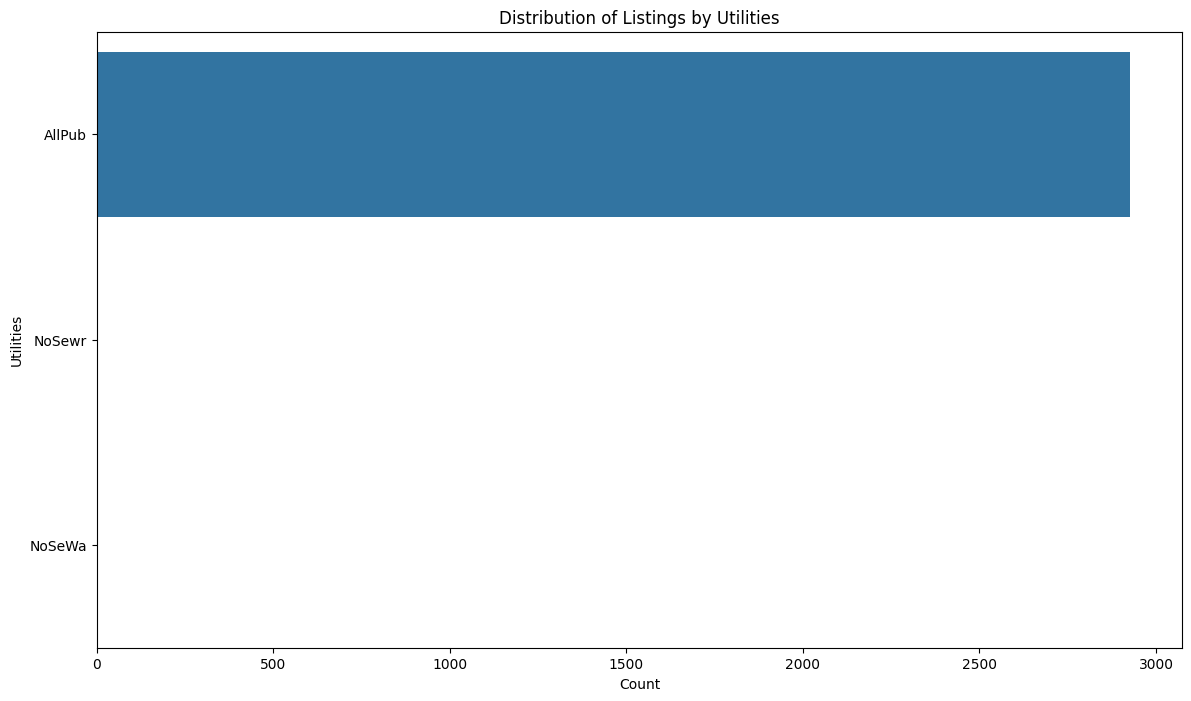

Average SalePrice by Utilities:
Utilities
AllPub    180875.412026
NoSeWa    137500.000000
NoSewr     86312.500000
Name: SalePrice, dtype: float64

Analyzing categorical column: Lot Config


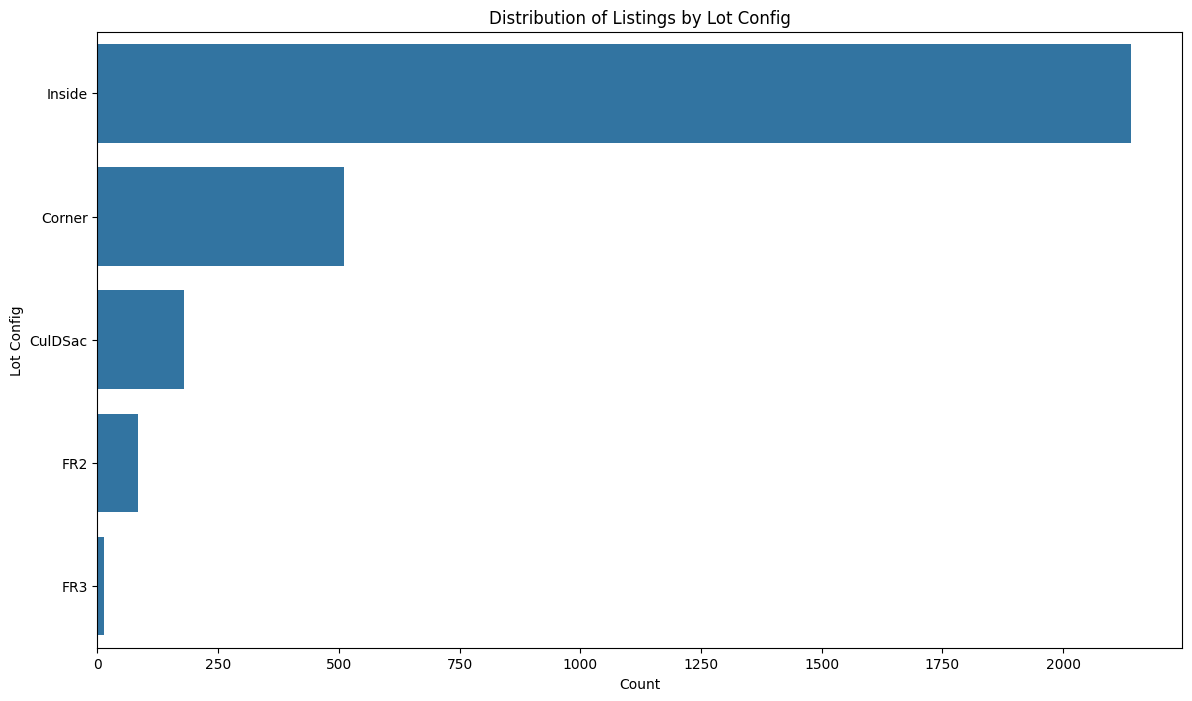

Average SalePrice by Lot Config:
Lot Config
CulDSac    225531.872222
FR3        196635.857143
Corner     179956.937378
Inside     177395.035514
FR2        174122.894118
Name: SalePrice, dtype: float64

Analyzing categorical column: Land Slope


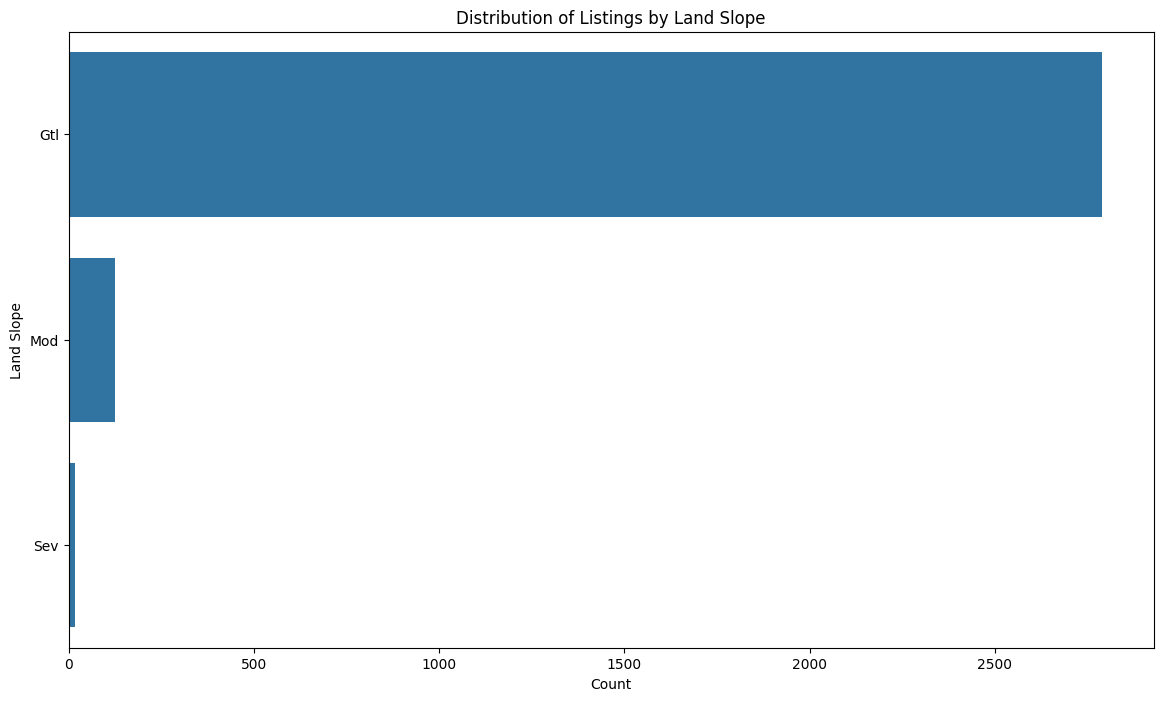

Average SalePrice by Land Slope:
Land Slope
Sev    207370.625000
Mod    204853.784000
Gtl    179565.365005
Name: SalePrice, dtype: float64

Analyzing categorical column: Neighborhood


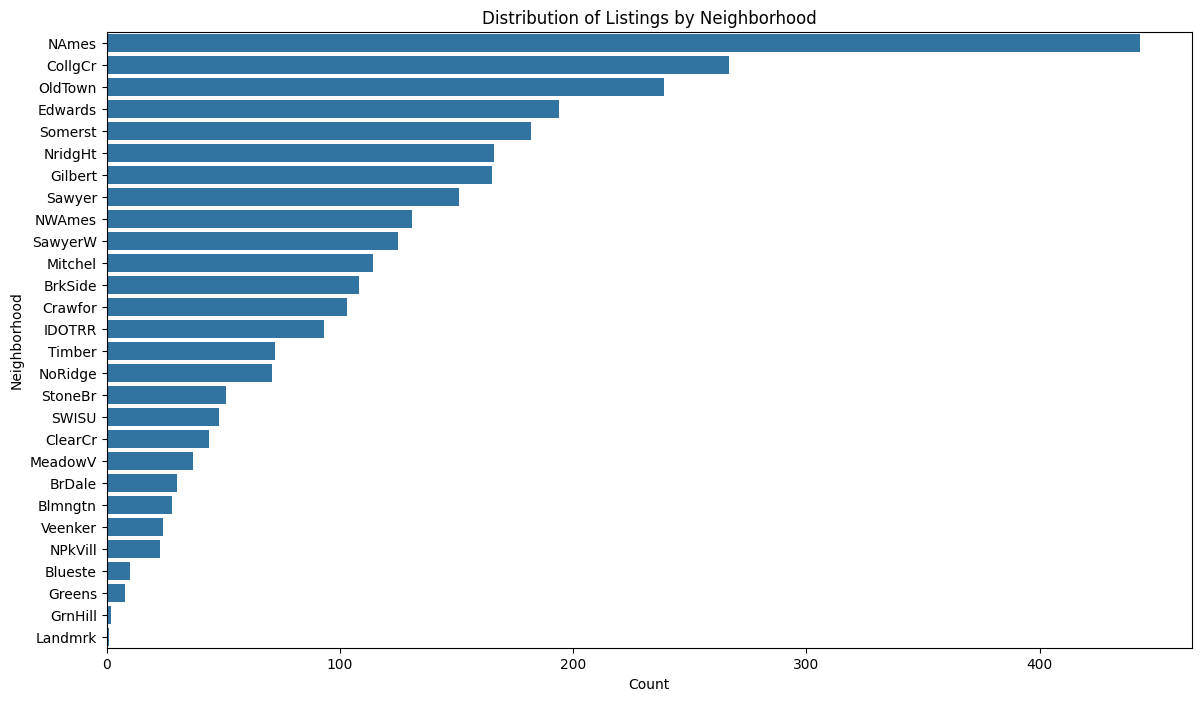

Average SalePrice by Neighborhood:
Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246599.541667
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Blmngtn    196661.678571
Greens     193531.250000
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
Mitchel    162226.631579
NAmes      145097.349887
Blueste    143590.000000
NPkVill    140710.869565
Landmrk    137000.000000
Sawyer     136751.152318
SWISU      135071.937500
Edwards    130843.381443
BrkSide    124756.250000
OldTown    123991.891213
BrDale     105608.333333
IDOTRR     103752.903226
MeadowV     95756.486486
Name: SalePrice, dtype: float64

Analyzing categorical column: Condition 1


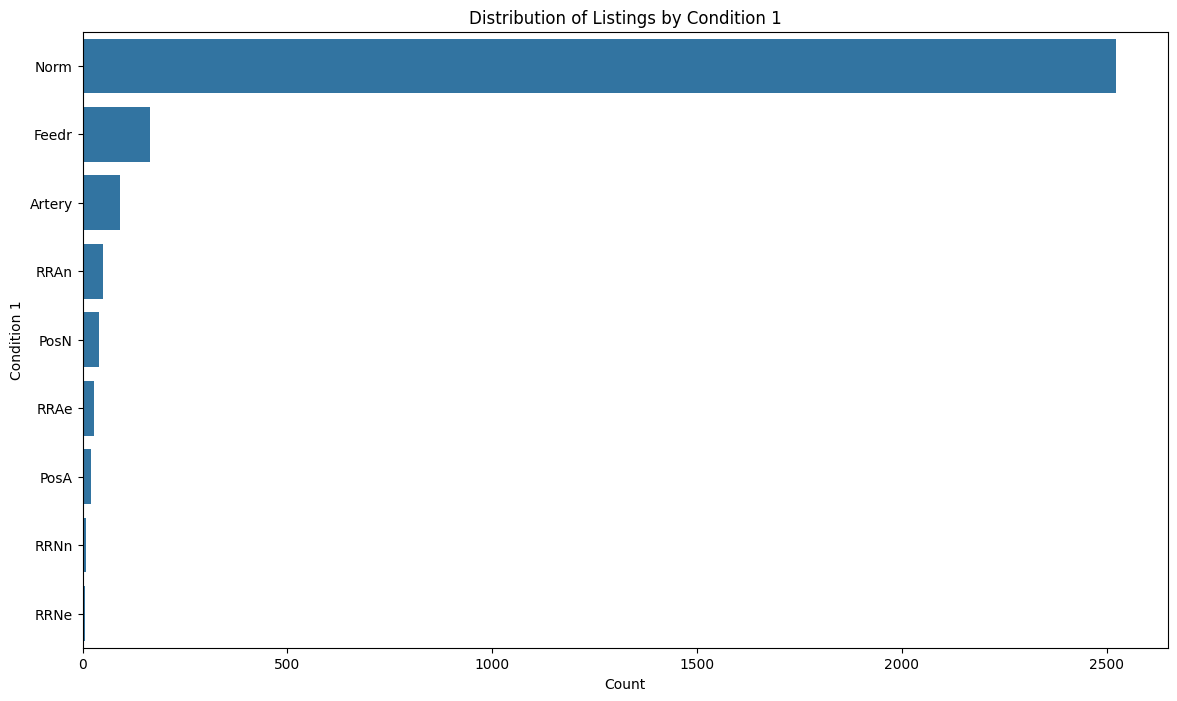

Average SalePrice by Condition 1:
Condition 1
PosA      253917.500000
PosN      245720.410256
RRNn      201027.777778
Norm      184050.511102
RRAn      181413.000000
Feedr     142605.615854
RRNe      142558.333333
RRAe      138710.714286
Artery    129229.891304
Name: SalePrice, dtype: float64

Analyzing categorical column: Condition 2


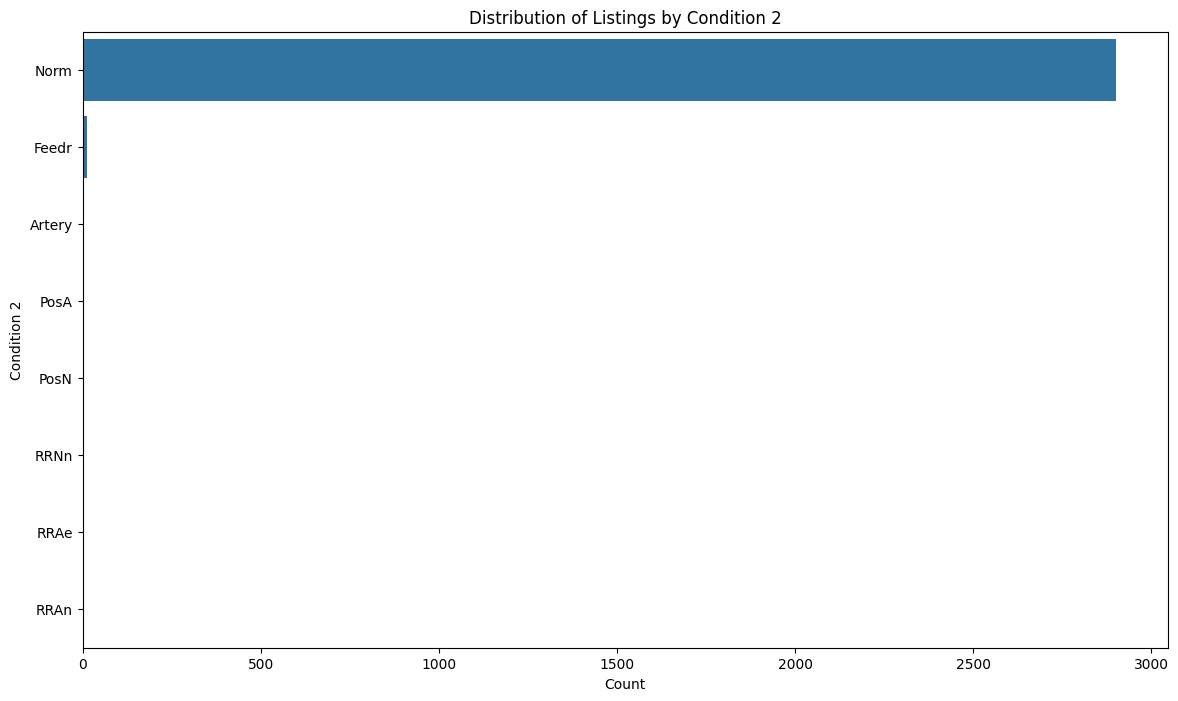

Average SalePrice by Condition 2:
Condition 2
PosA      445500.000000
PosN      342937.500000
RRAe      190000.000000
Norm      180615.569310
RRAn      136905.000000
Feedr     129069.230769
Artery    119050.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Bldg Type


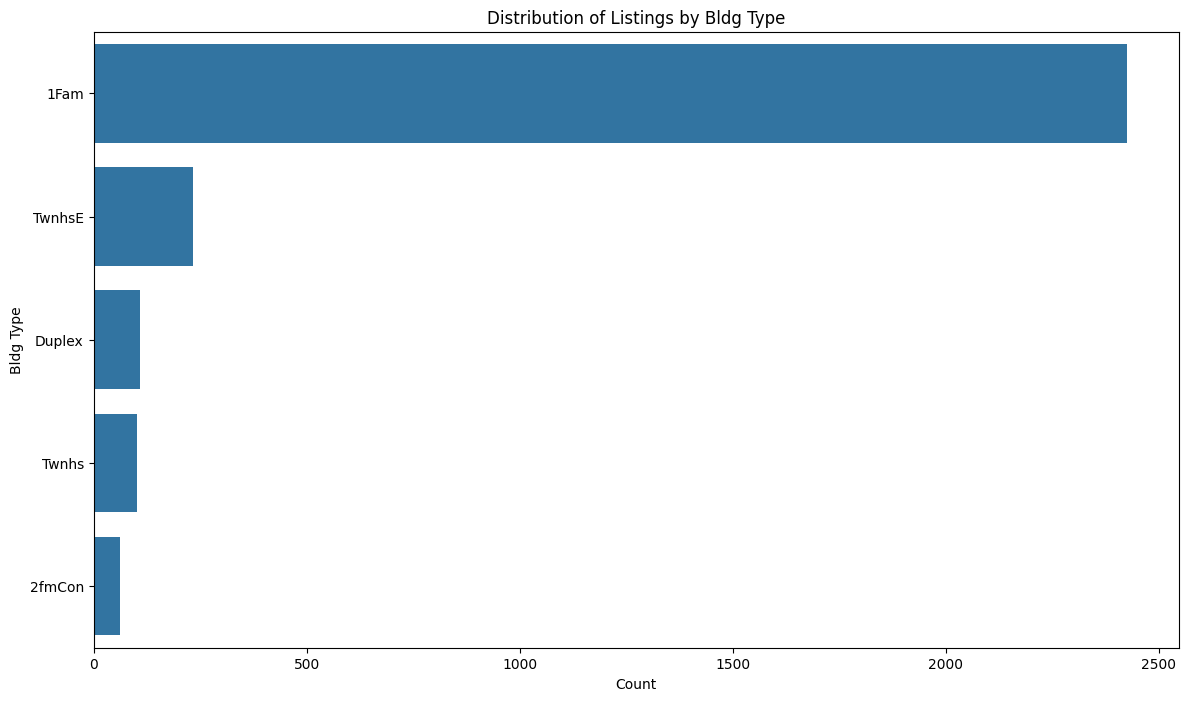

Average SalePrice by Bldg Type:
Bldg Type
TwnhsE    192311.914163
1Fam      184812.041237
Duplex    139808.935780
Twnhs     135934.059406
2fmCon    125581.709677
Name: SalePrice, dtype: float64

Analyzing categorical column: House Style


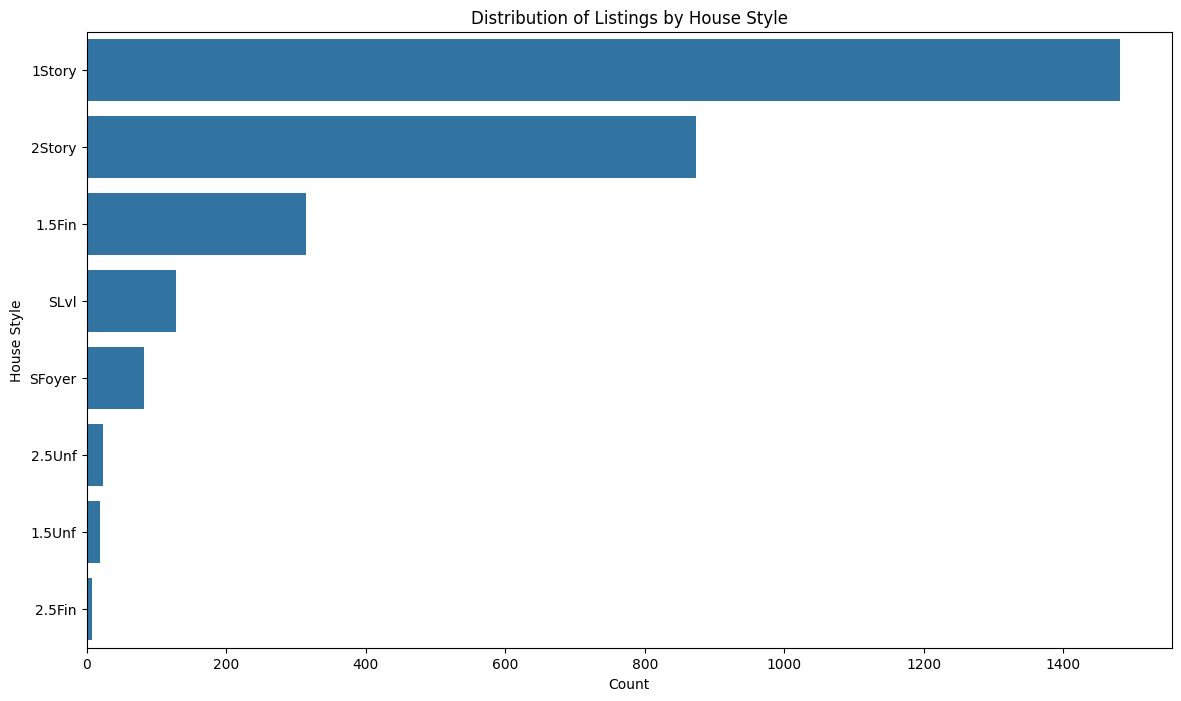

Average SalePrice by House Style:
House Style
2.5Fin    220000.000000
2Story    206990.159221
1Story    178699.875084
2.5Unf    177158.333333
SLvl      165527.382812
SFoyer    143472.662651
1.5Fin    137529.923567
1.5Unf    109663.157895
Name: SalePrice, dtype: float64

Analyzing categorical column: Roof Style


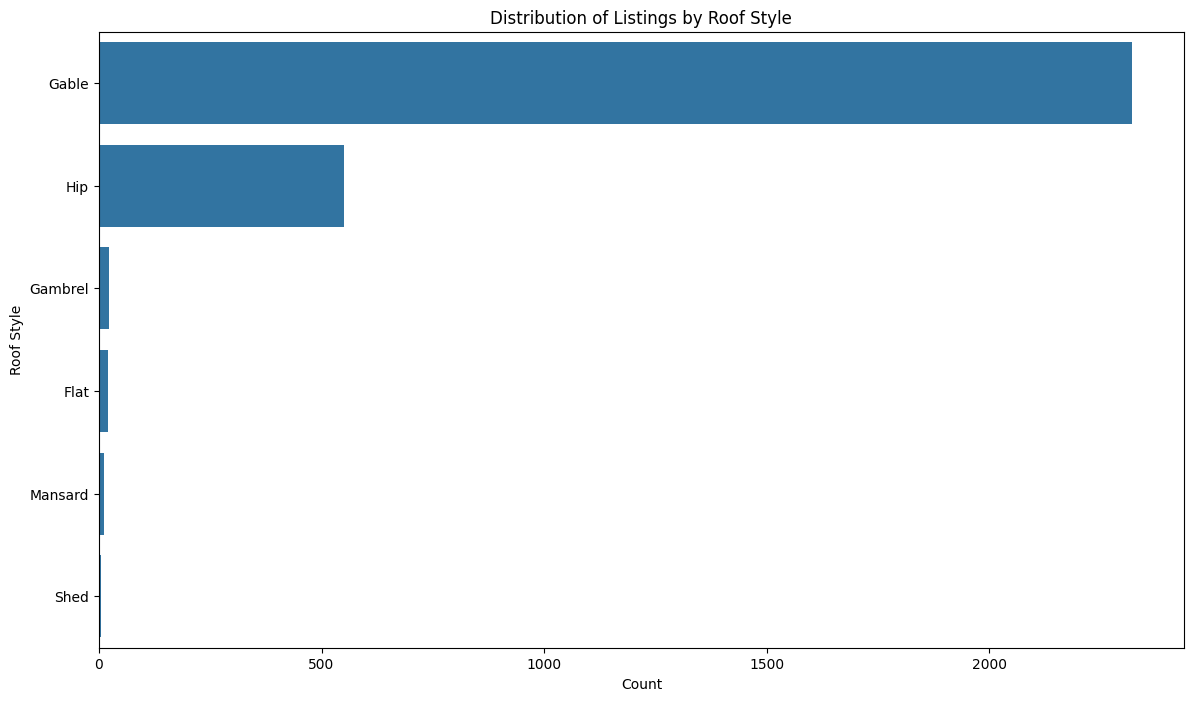

Average SalePrice by Roof Style:
Roof Style
Hip        226689.517241
Shed       193200.000000
Flat       184798.500000
Gable      170311.854373
Mansard    166225.363636
Gambrel    138284.954545
Name: SalePrice, dtype: float64

Analyzing categorical column: Roof Matl


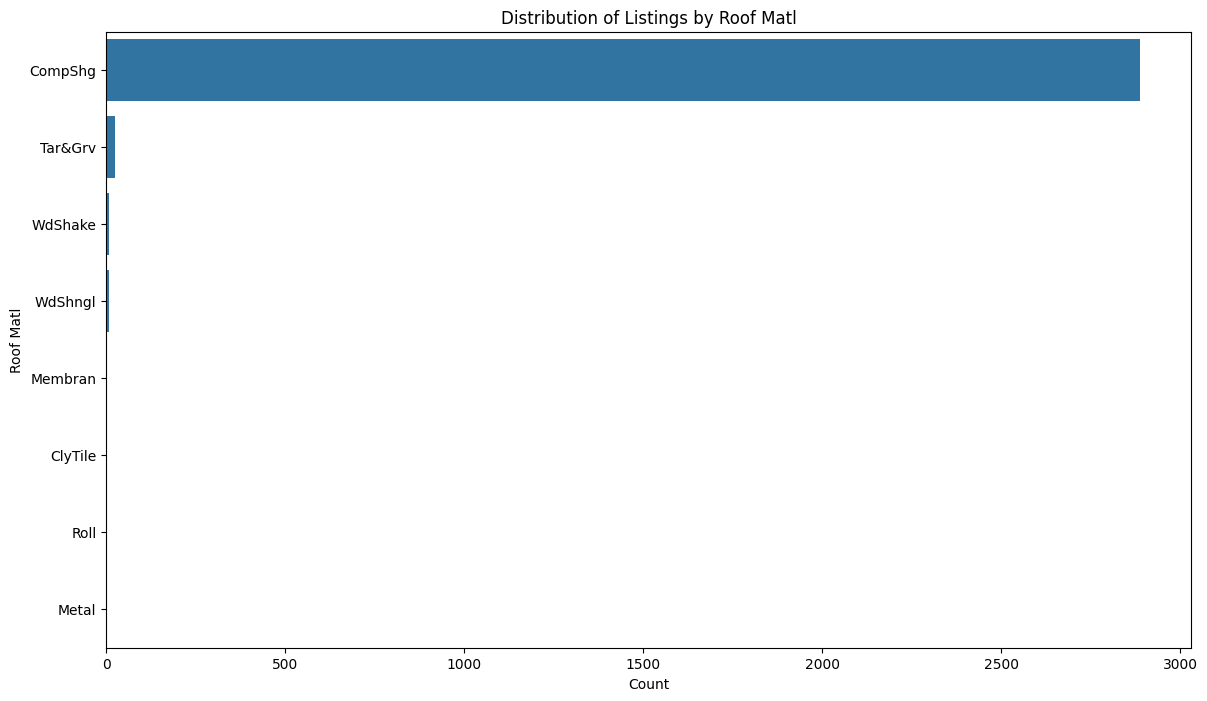

Average SalePrice by Roof Matl:
Roof Matl
WdShngl    374357.142857
Membran    241500.000000
WdShake    238444.444444
Tar&Grv    185140.608696
CompShg    180114.036024
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Exterior 1st


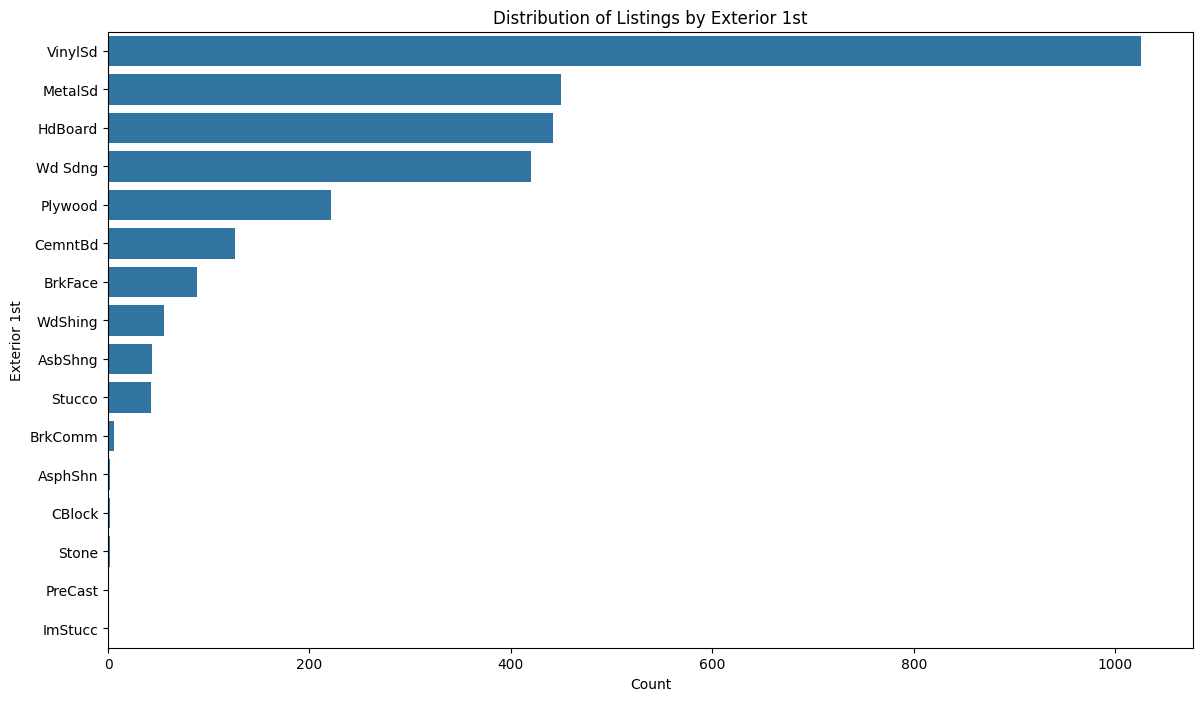

Average SalePrice by Exterior 1st:
Exterior 1st
ImStucc    262000.000000
PreCast    260000.000000
Stone      258500.000000
CemntBd    234336.158730
VinylSd    217183.183236
BrkFace    187803.034091
Plywood    167988.307692
HdBoard    160872.957014
MetalSd    153775.160000
WdShing    152767.982143
Stucco     149760.465116
Wd Sdng    146966.119048
BrkComm    137500.000000
AsbShng    101501.136364
CBlock      93250.000000
AsphShn     91187.500000
Name: SalePrice, dtype: float64

Analyzing categorical column: Exterior 2nd


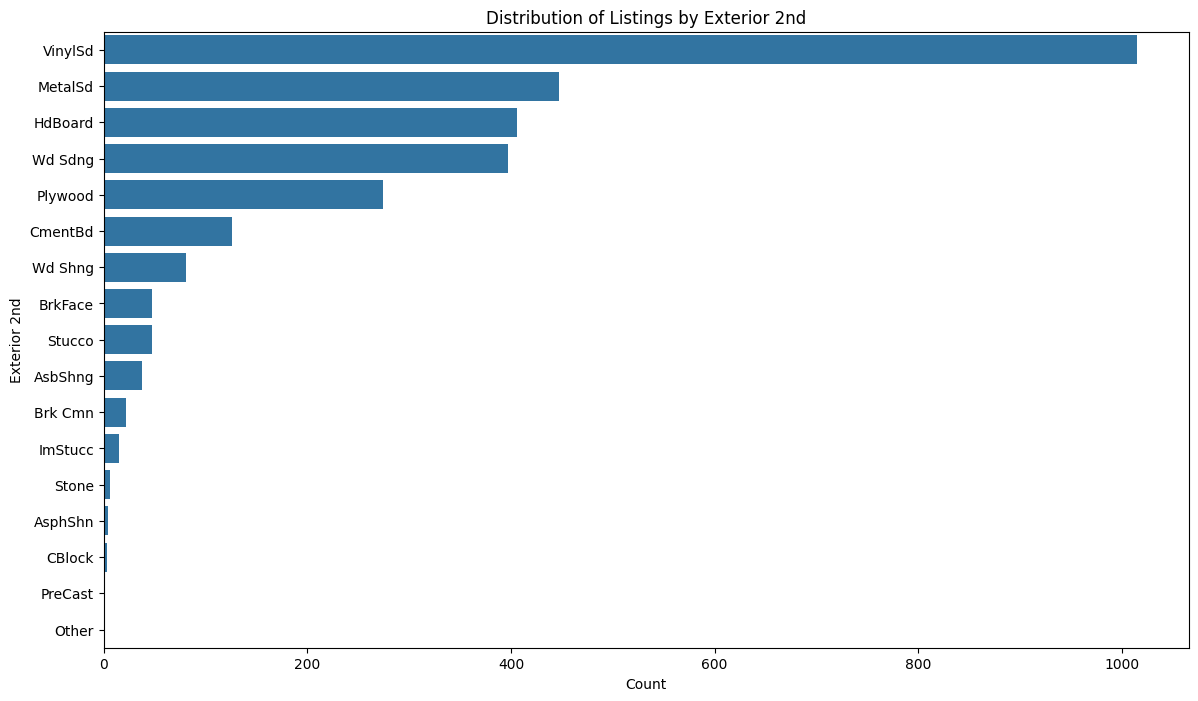

Average SalePrice by Exterior 2nd:
Exterior 2nd
Other      319000.000000
PreCast    260000.000000
ImStucc    257946.666667
CmentBd    233229.015873
VinylSd    217126.563547
BrkFace    188160.638298
Plywood    164015.445255
HdBoard    161738.701970
MetalSd    155553.293065
Wd Shng    154001.851852
Stucco     148587.659574
Wd Sdng    146944.337531
Stone      145420.666667
Brk Cmn    137536.363636
AsphShn    124093.750000
CBlock     114666.666667
AsbShng    105225.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Exter Qual


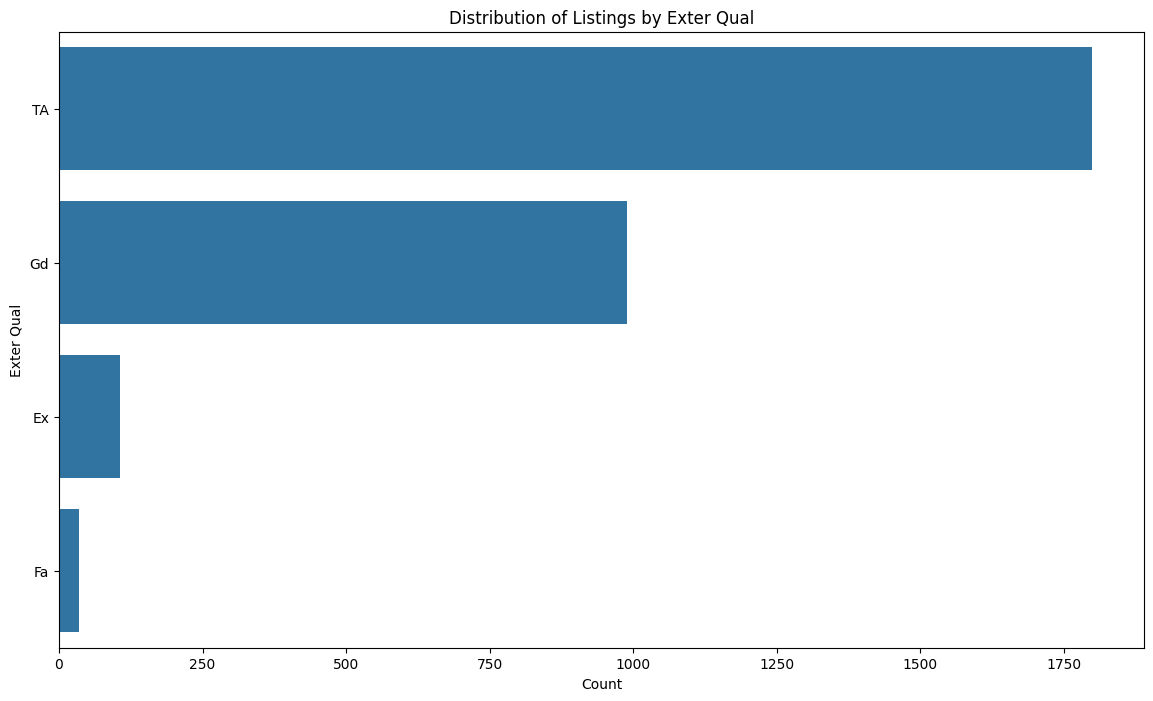

Average SalePrice by Exter Qual:
Exter Qual
Ex    377918.616822
Gd    230756.384226
TA    143373.968316
Fa     89923.742857
Name: SalePrice, dtype: float64

Analyzing categorical column: Exter Cond


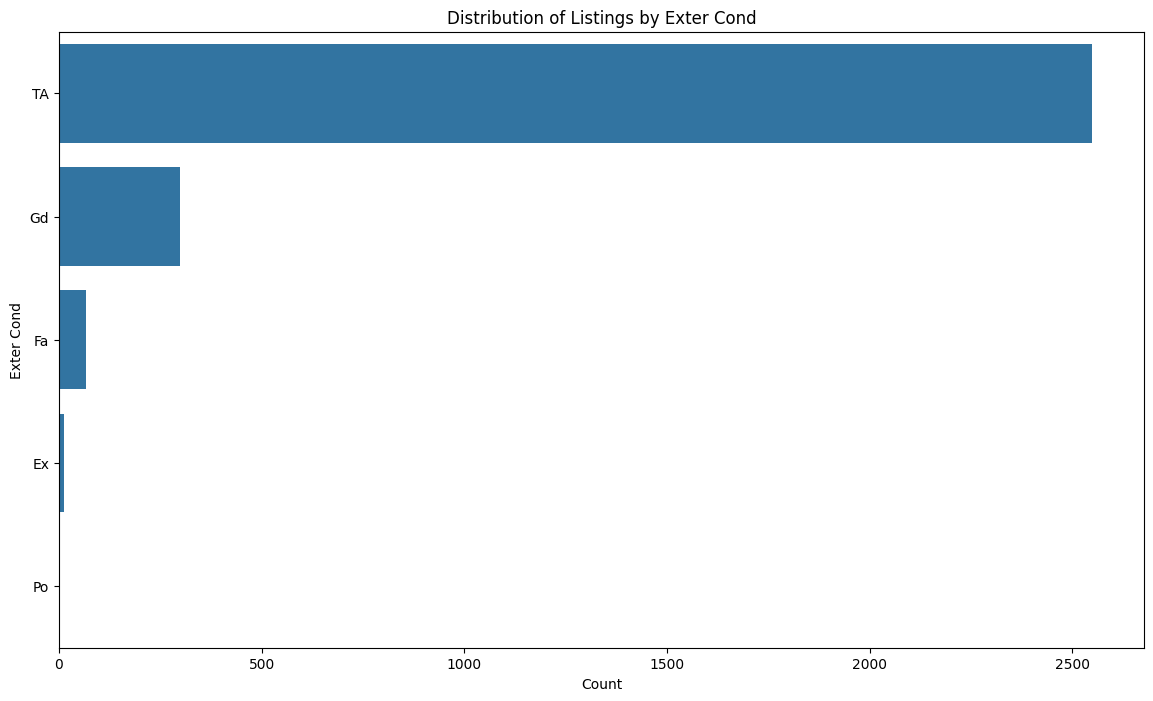

Average SalePrice by Exter Cond:
Exter Cond
Ex    217699.750000
TA    184421.103570
Gd    165803.762542
Fa    107563.298507
Po     82866.666667
Name: SalePrice, dtype: float64

Analyzing categorical column: Foundation


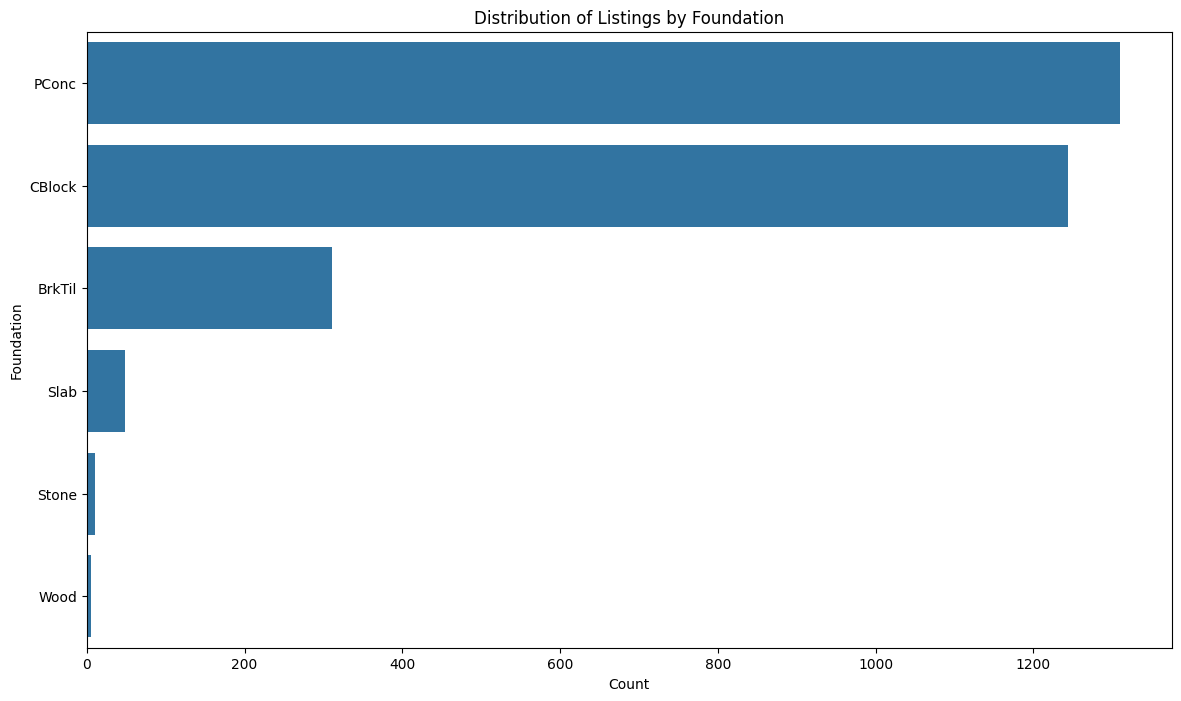

Average SalePrice by Foundation:
Foundation
PConc     227069.483969
Wood      180900.000000
Stone     149786.818182
CBlock    148284.153537
BrkTil    128107.276527
Slab      110457.693878
Name: SalePrice, dtype: float64

Analyzing categorical column: Bsmt Qual


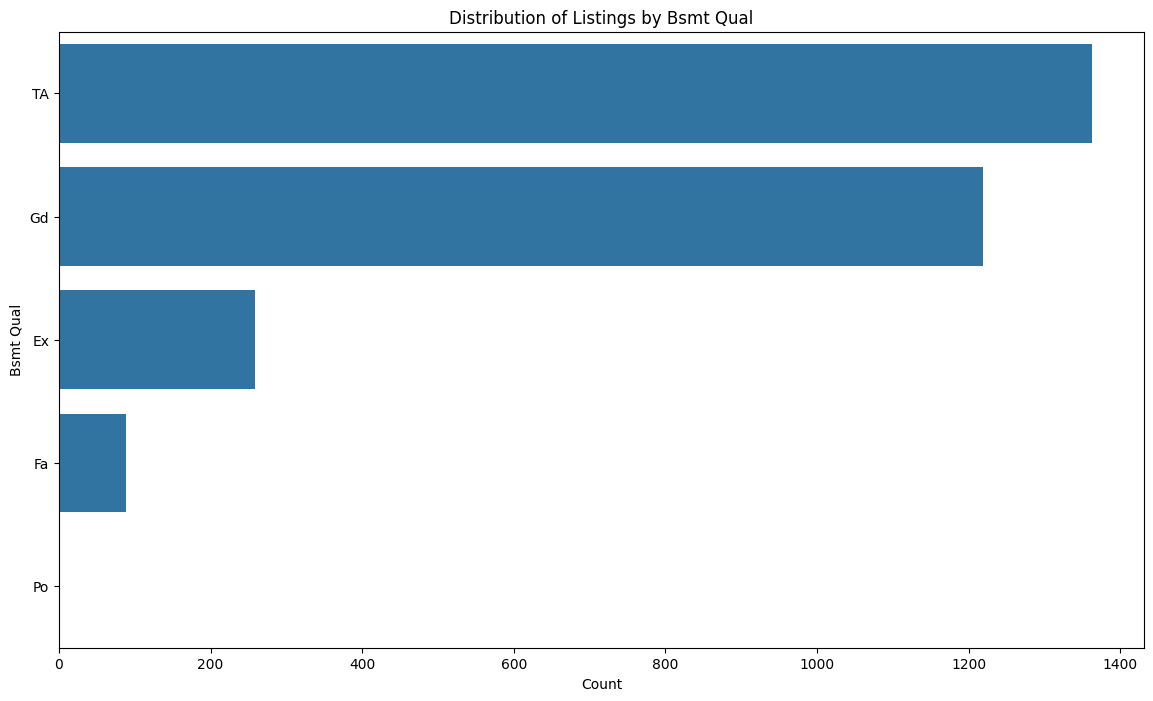

Average SalePrice by Bsmt Qual:
Bsmt Qual
Ex    333369.313953
Gd    201726.765381
TA    137931.360968
Fa    109635.238636
Po     84950.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Bsmt Cond


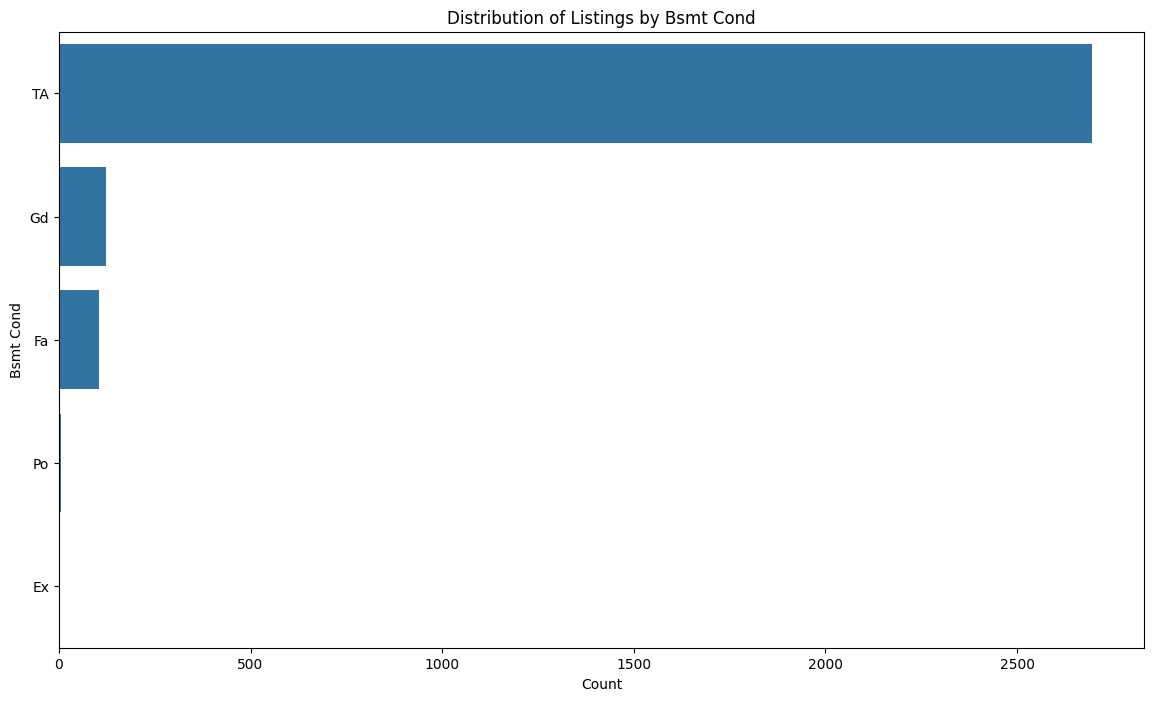

Average SalePrice by Bsmt Cond:
Bsmt Cond
Gd    214604.303279
Ex    195000.000000
TA    181572.924703
Po    124063.200000
Fa    123315.480769
Name: SalePrice, dtype: float64

Analyzing categorical column: Bsmt Exposure


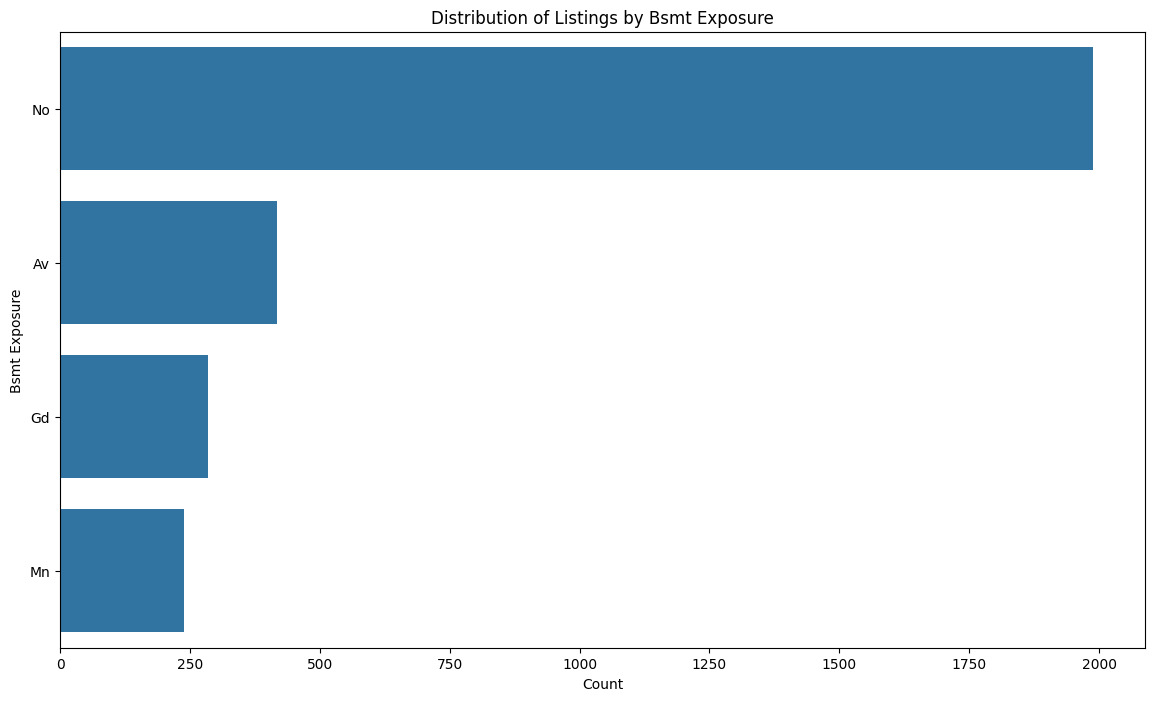

Average SalePrice by Bsmt Exposure:
Bsmt Exposure
Gd    267507.644366
Av    207438.478469
Mn    187559.100418
No    162003.205631
Name: SalePrice, dtype: float64

Analyzing categorical column: BsmtFin Type 1


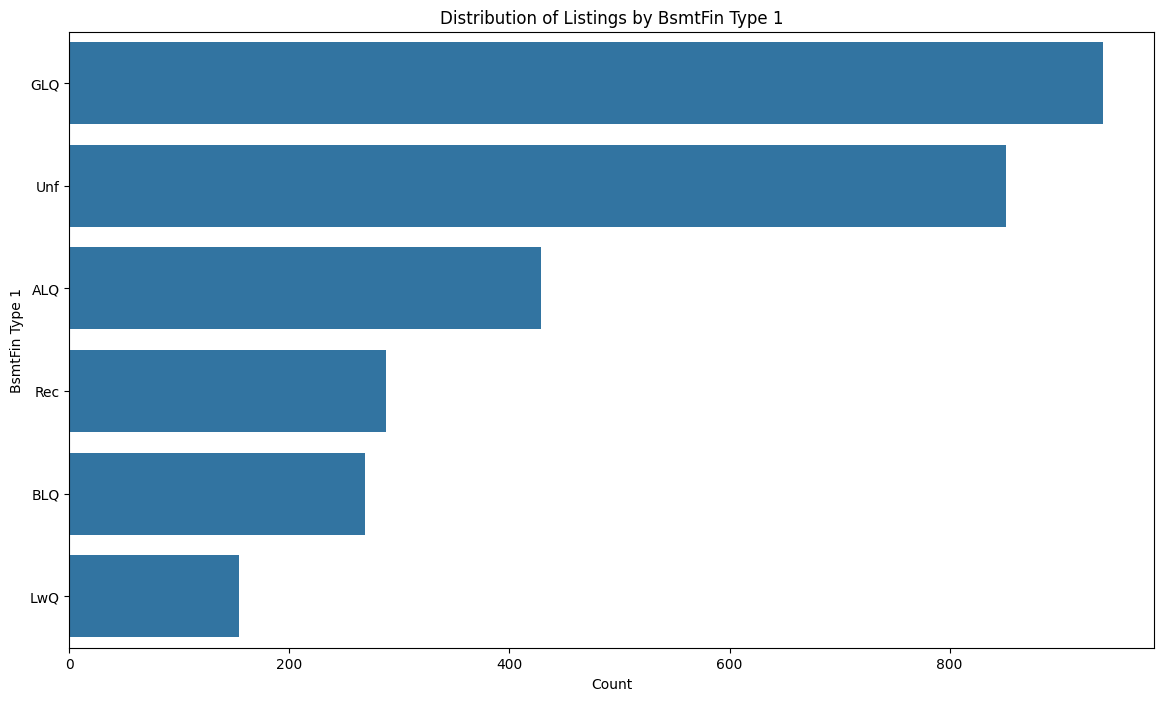

Average SalePrice by BsmtFin Type 1:
BsmtFin Type 1
GLQ    226184.888179
Unf    167430.411281
ALQ    163012.920746
LwQ    152191.077922
BLQ    150084.182156
Rec    142774.138889
Name: SalePrice, dtype: float64

Analyzing categorical column: BsmtFin Type 2


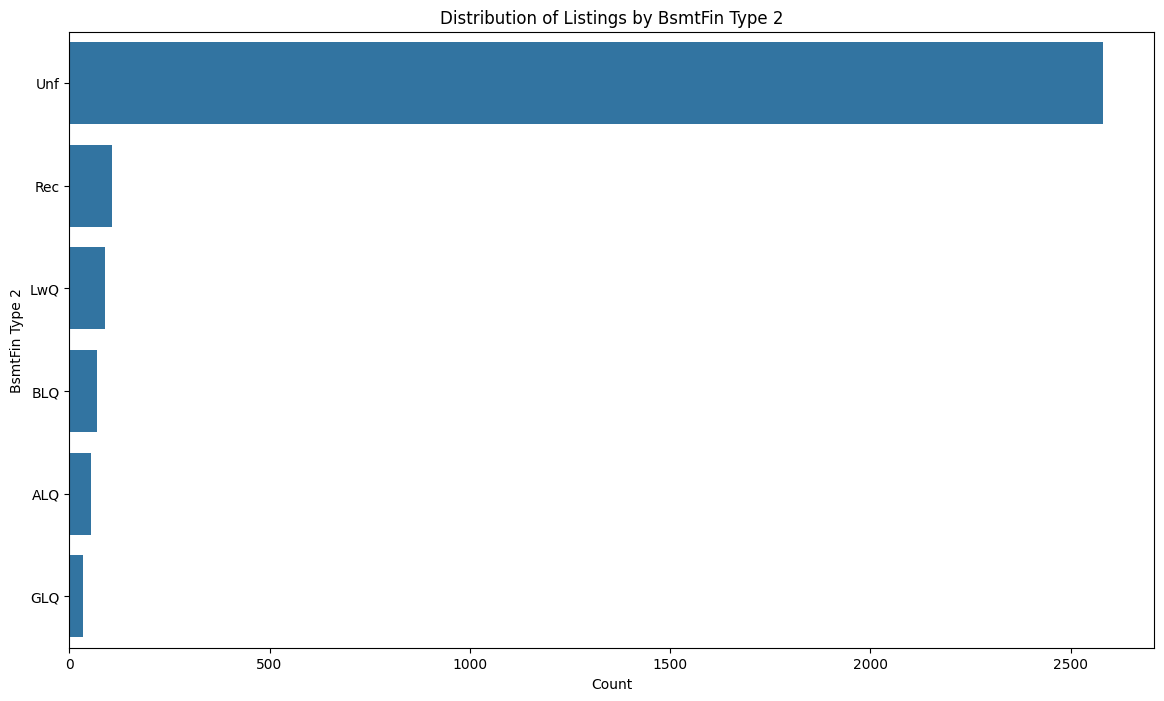

Average SalePrice by BsmtFin Type 2:
BsmtFin Type 2
GLQ    210585.294118
ALQ    188644.339623
Unf    182199.117442
LwQ    162617.134831
Rec    161613.443396
BLQ    160246.073529
Name: SalePrice, dtype: float64

Analyzing categorical column: Heating


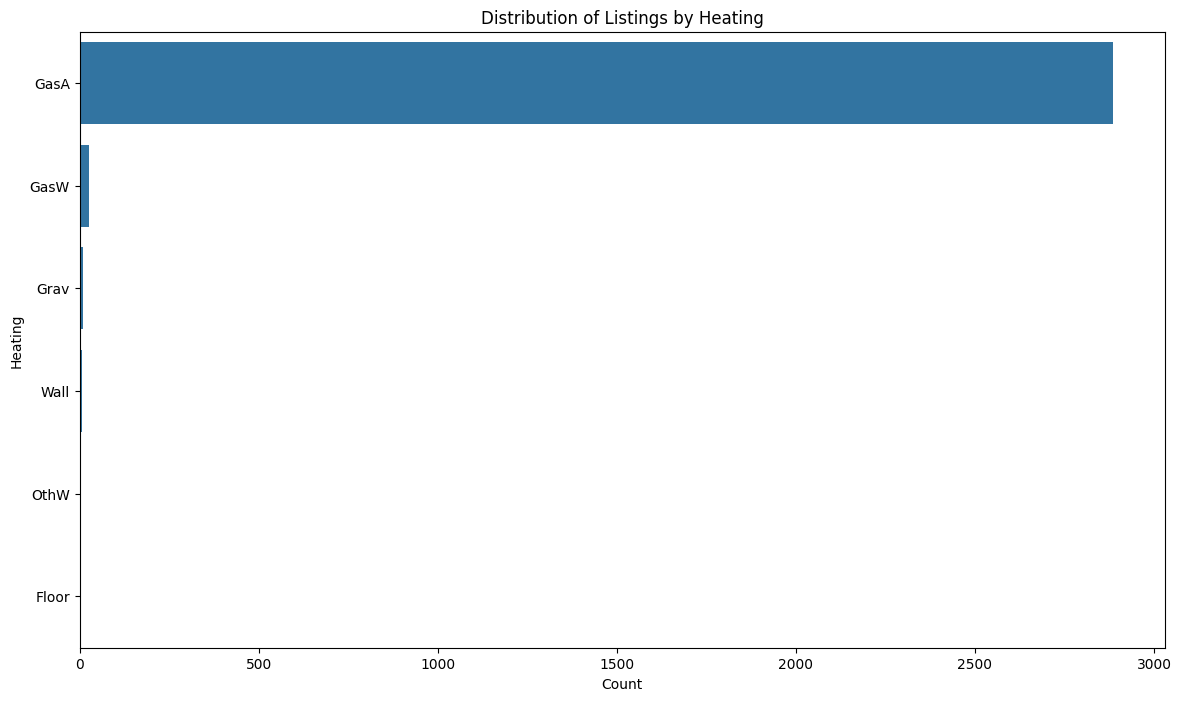

Average SalePrice by Heating:
Heating
GasA     181594.075563
GasW     159009.185185
OthW     125750.000000
Grav      83711.111111
Wall      77150.000000
Floor     72500.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Heating QC


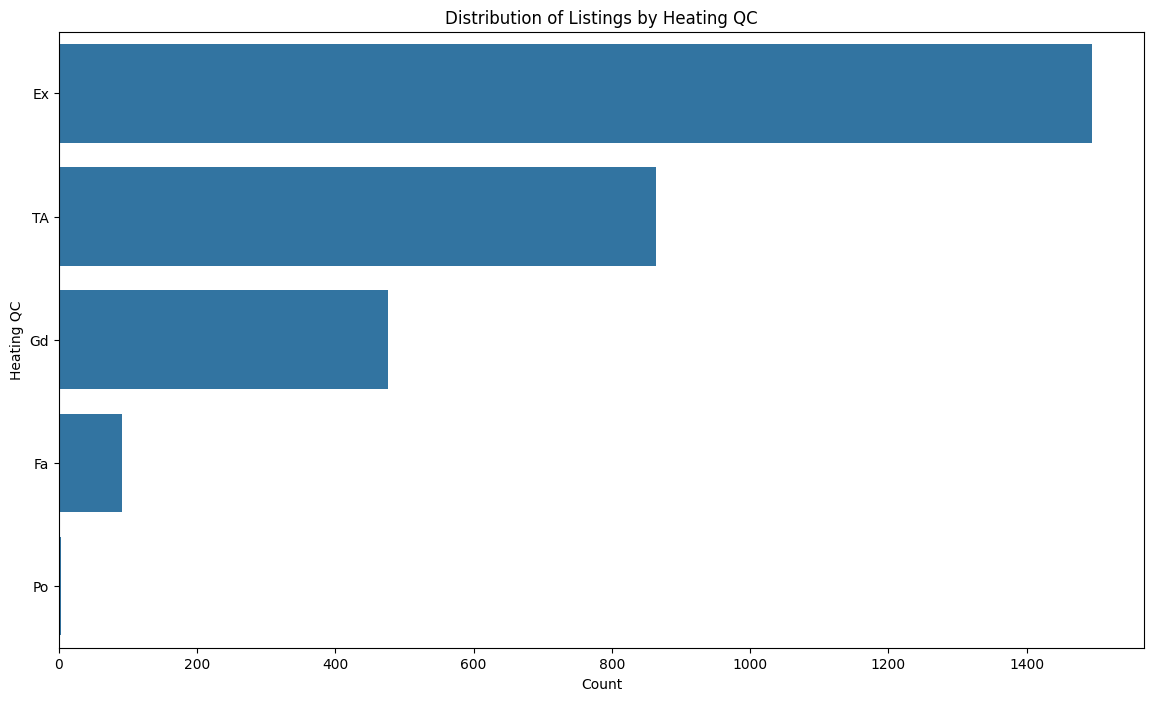

Average SalePrice by Heating QC:
Heating QC
Ex    216366.597993
Gd    156855.056723
TA    138984.863426
Fa    122949.597826
Po     69033.333333
Name: SalePrice, dtype: float64

Analyzing categorical column: Central Air


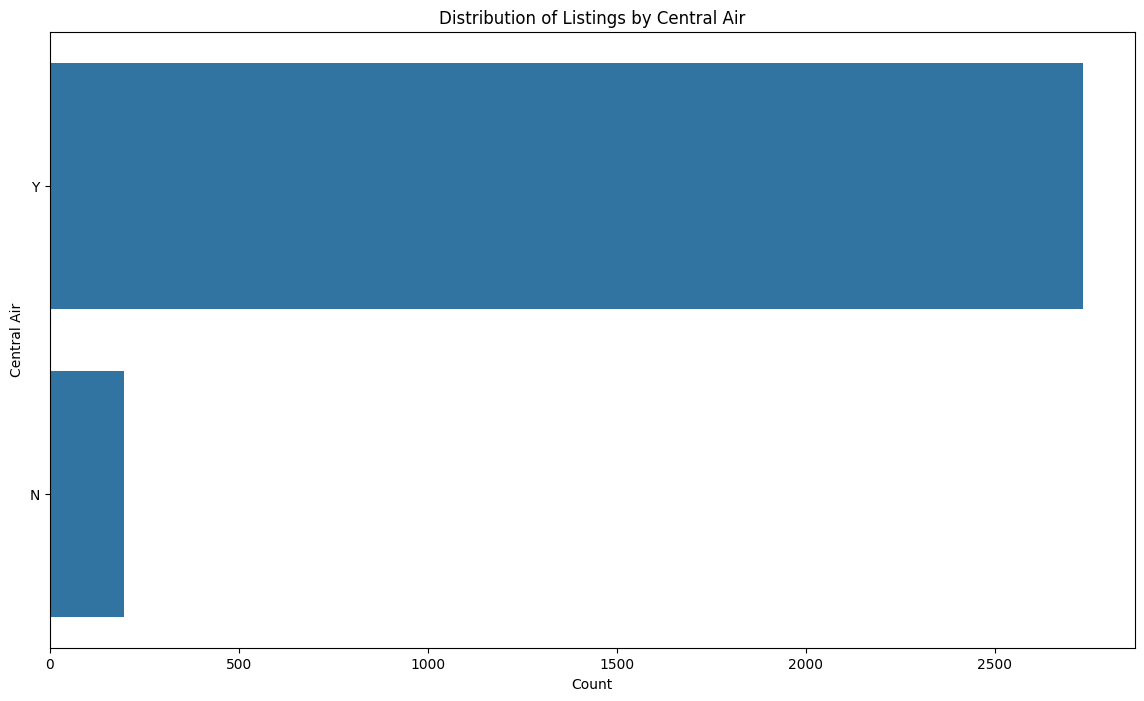

Average SalePrice by Central Air:
Central Air
Y    186452.787857
N    101890.479592
Name: SalePrice, dtype: float64

Analyzing categorical column: Electrical


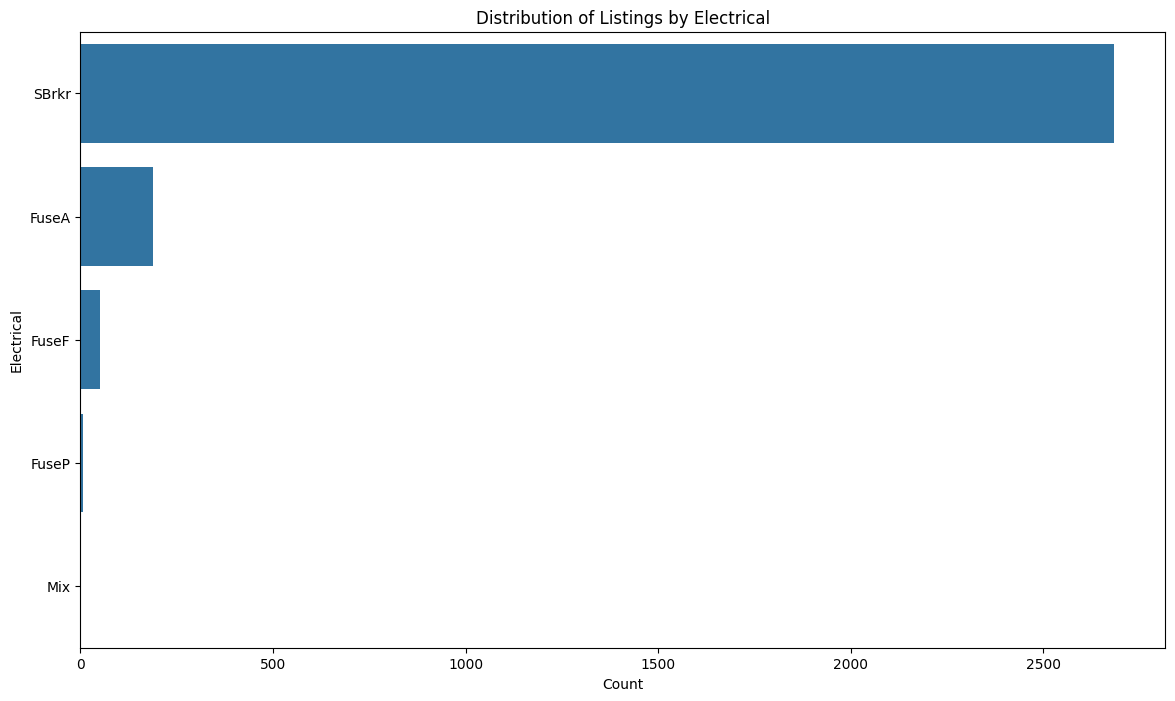

Average SalePrice by Electrical:
Electrical
SBrkr    186609.204994
FuseA    122264.079787
FuseF    105718.240000
FuseP     90175.000000
Mix       67000.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Kitchen Qual


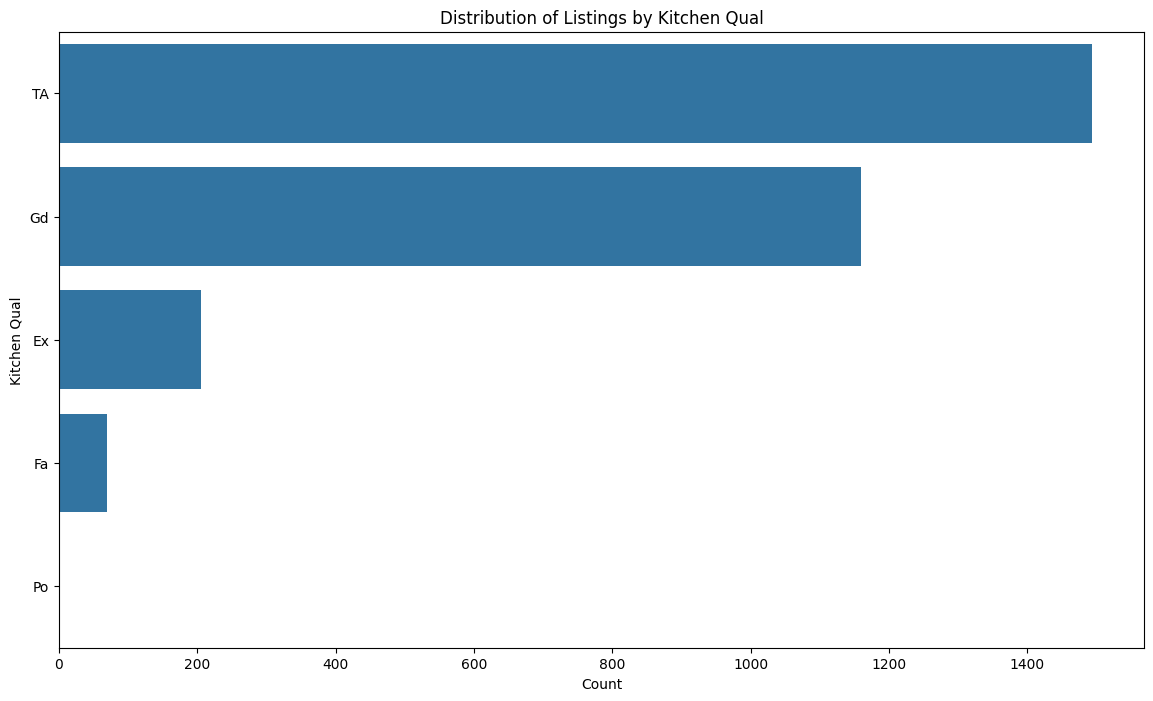

Average SalePrice by Kitchen Qual:
Kitchen Qual
Ex    337339.341463
Gd    210835.582759
TA    139549.947791
Po    107500.000000
Fa    105907.042857
Name: SalePrice, dtype: float64

Analyzing categorical column: Functional


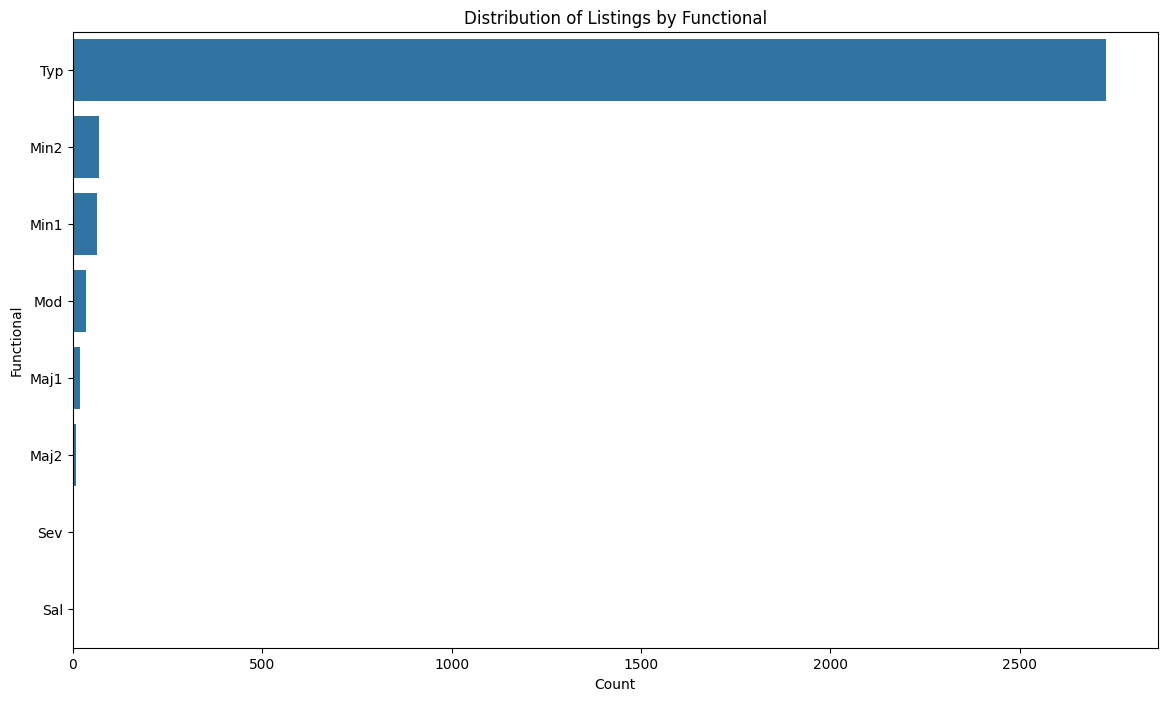

Average SalePrice by Functional:
Functional
Typ     183389.953446
Maj1    152751.263158
Mod     151640.085714
Min1    151094.615385
Min2    147701.885714
Sev      95750.000000
Maj2     91122.666667
Sal      31550.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Fireplace Qu


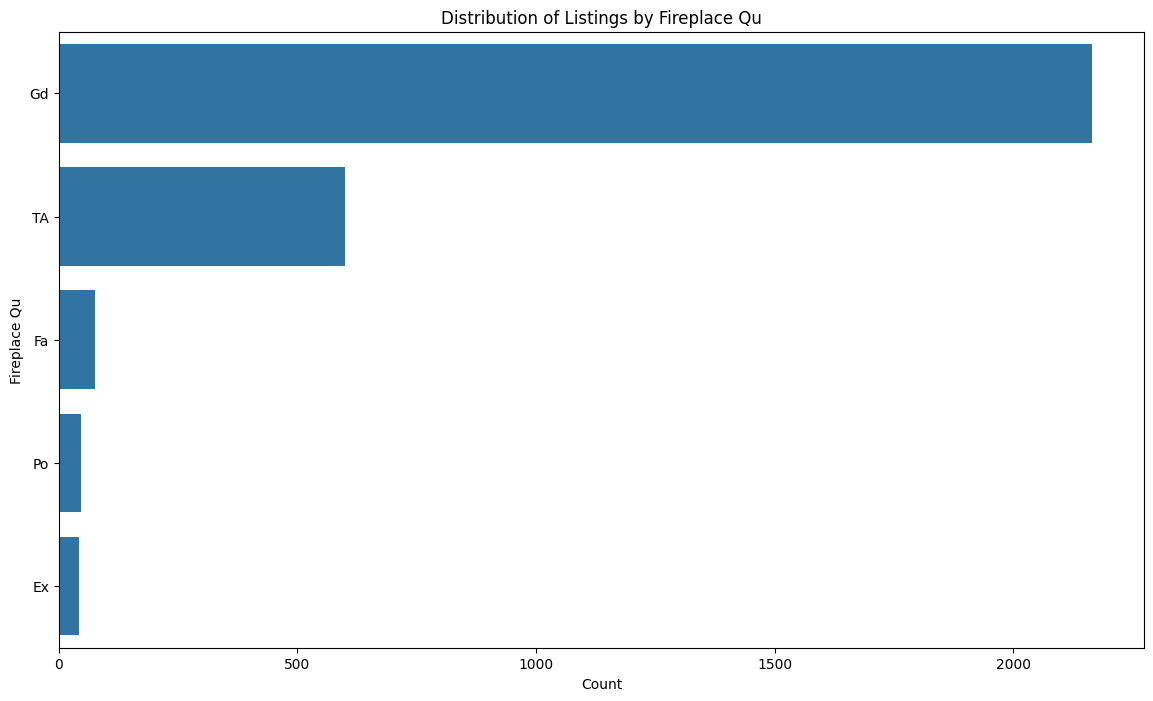

Average SalePrice by Fireplace Qu:
Fireplace Qu
Ex    344432.325581
TA    204561.973333
Gd    172274.978763
Fa    166759.266667
Po    141959.413043
Name: SalePrice, dtype: float64

Analyzing categorical column: Garage Type


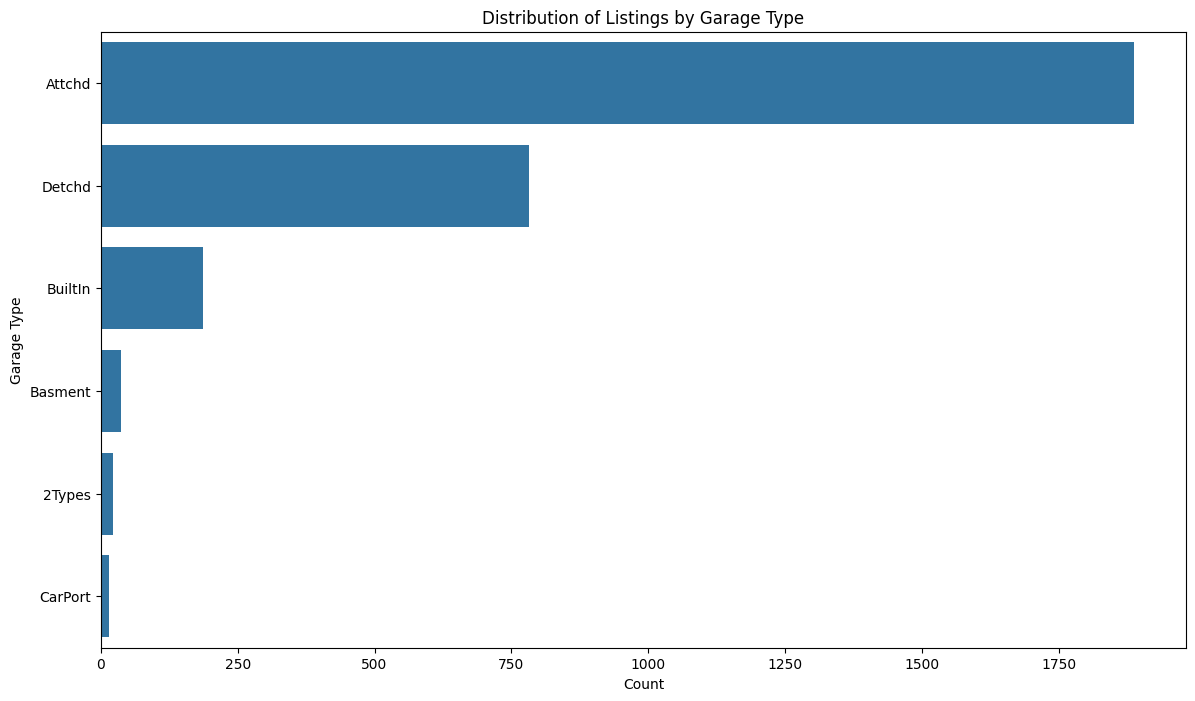

Average SalePrice by Garage Type:
Garage Type
BuiltIn    249344.150538
Attchd     195554.478814
2Types     154639.130435
Basment    150473.416667
Detchd     132468.471867
CarPort    105566.666667
Name: SalePrice, dtype: float64

Analyzing categorical column: Garage Finish


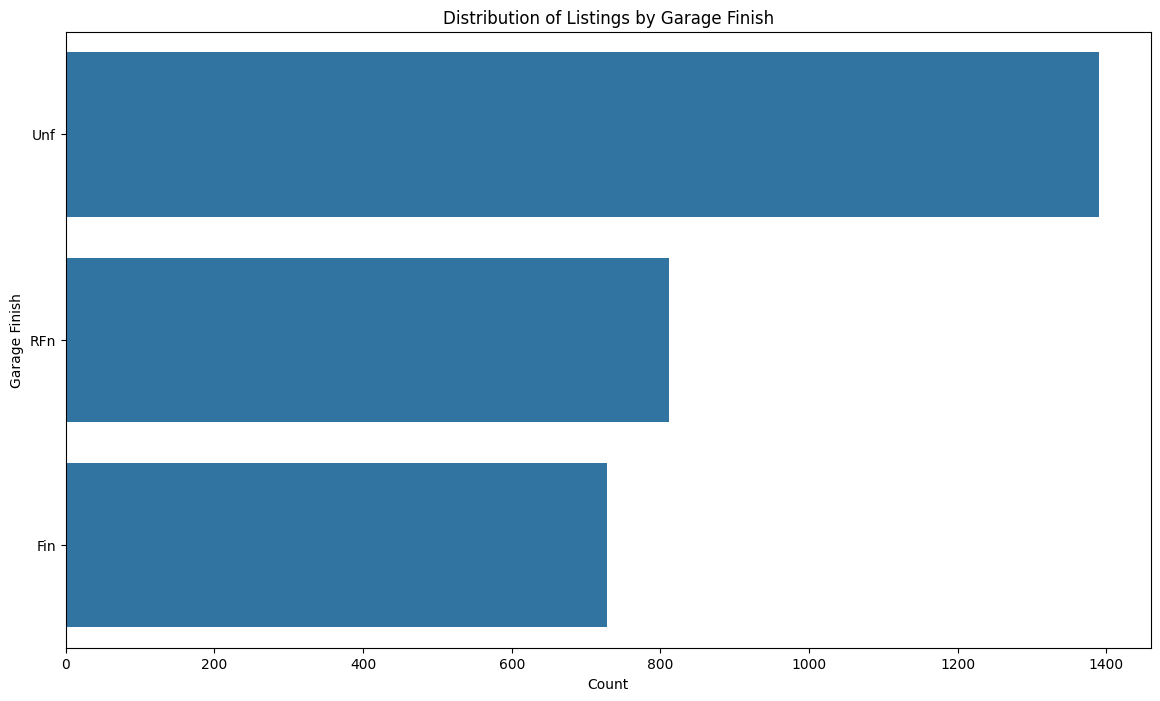

Average SalePrice by Garage Finish:
Garage Finish
Fin    239820.456044
RFn    202619.366995
Unf    137133.984173
Name: SalePrice, dtype: float64

Analyzing categorical column: Garage Qual


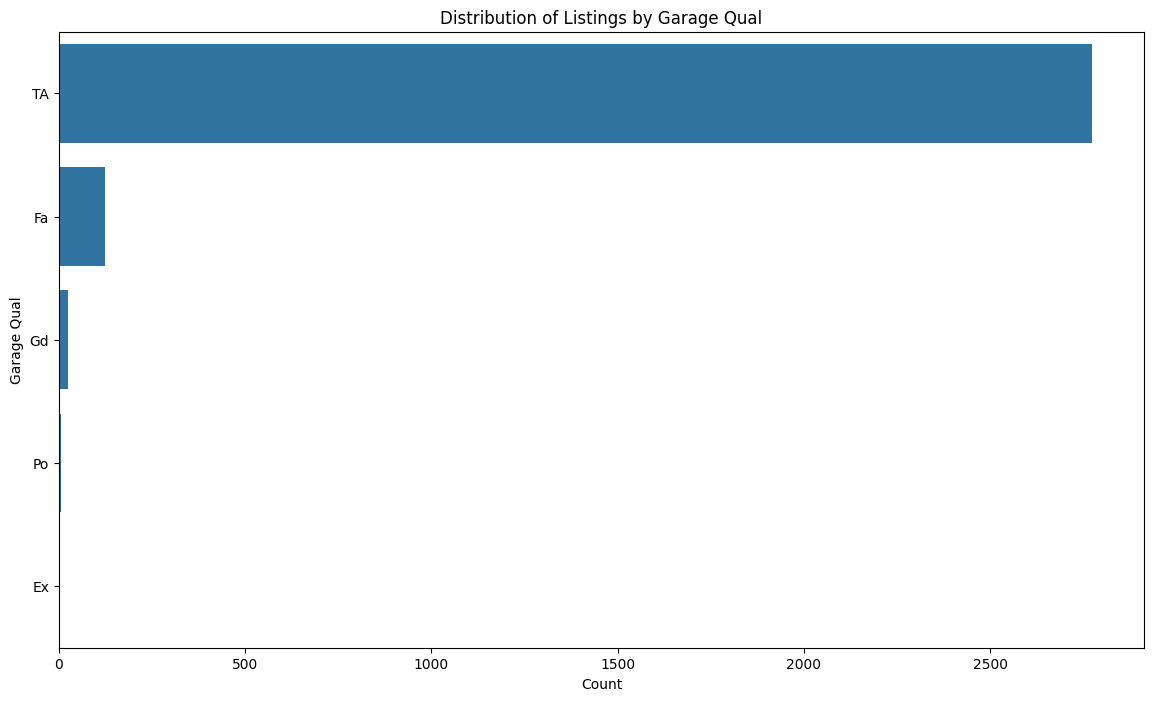

Average SalePrice by Garage Qual:
Garage Qual
Gd    243772.375000
Ex    241000.000000
TA    183166.990988
Fa    117816.822581
Po     88880.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Garage Cond


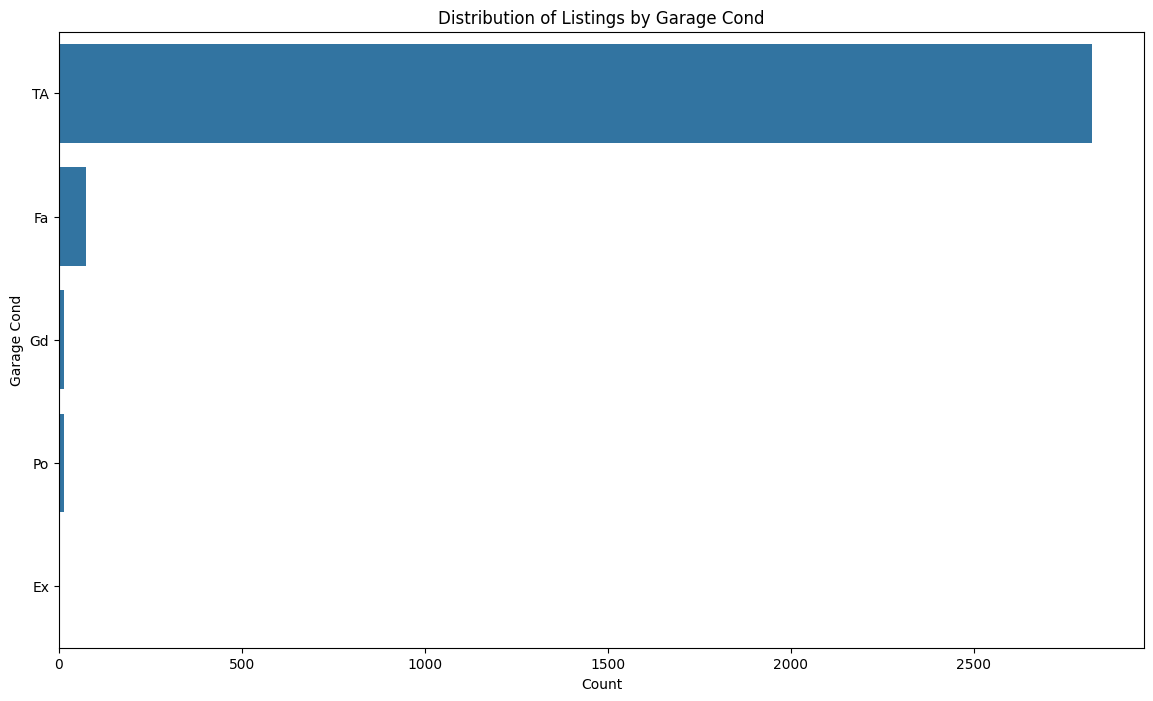

Average SalePrice by Garage Cond:
Garage Cond
Gd    194058.000000
TA    183131.817280
Ex    125000.000000
Fa    107492.351351
Po     94850.000000
Name: SalePrice, dtype: float64

Analyzing categorical column: Paved Drive


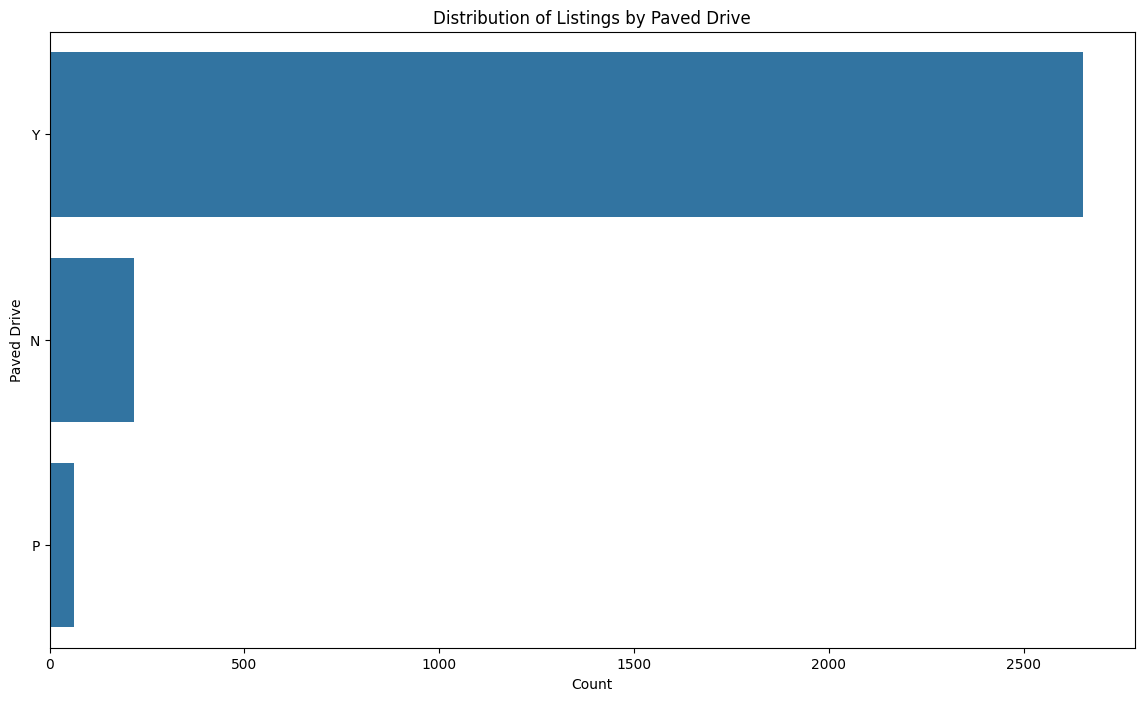

Average SalePrice by Paved Drive:
Paved Drive
Y    187864.071267
P    134782.322581
N    107224.236111
Name: SalePrice, dtype: float64

Analyzing categorical column: Sale Type


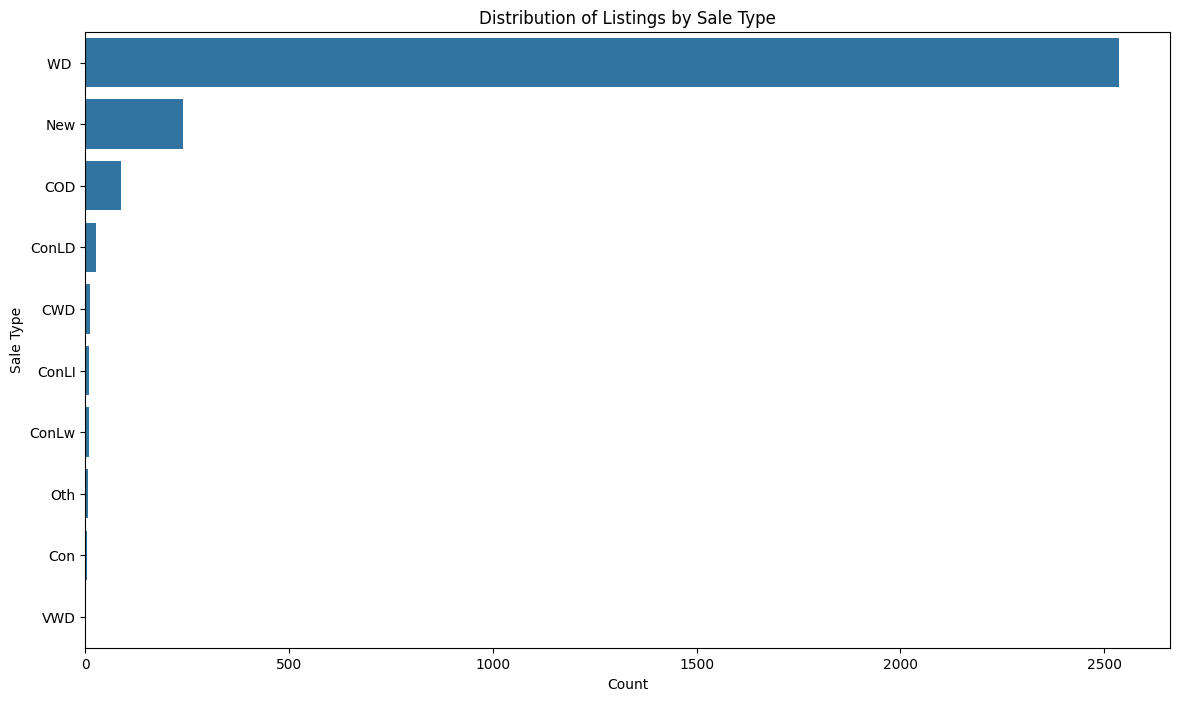

Average SalePrice by Sale Type:
Sale Type
New      275751.309623
Con      224446.000000
CWD      184237.500000
ConLI    180105.555556
WD       174361.935331
VWD      137000.000000
COD      132248.287356
ConLD    125748.192308
ConLw    121937.500000
Oth      114920.142857
Name: SalePrice, dtype: float64

Analyzing categorical column: Sale Condition


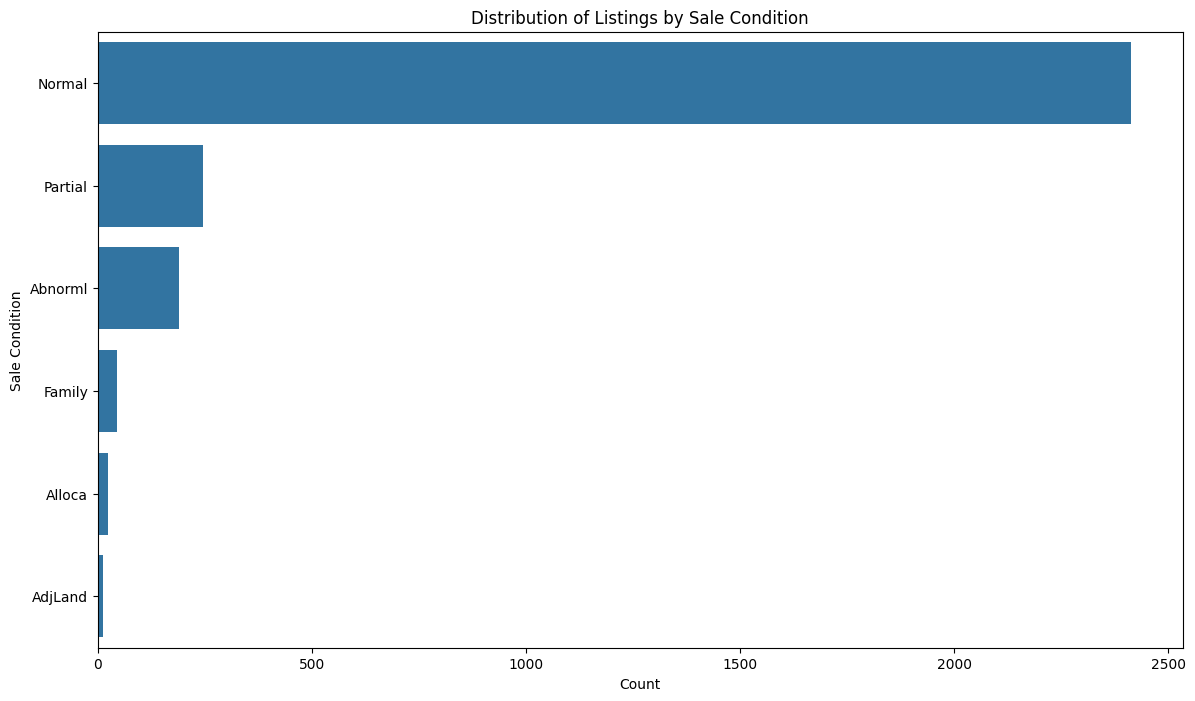

Average SalePrice by Sale Condition:
Sale Condition
Partial    273374.371429
Normal     175567.643183
Alloca     161843.708333
Family     157488.586957
Abnorml    140396.252632
AdjLand    108916.666667
Name: SalePrice, dtype: float64



In [32]:
# Identify all categorical columns in the cleaned DataFrame
cat_columns = df_clean.select_dtypes(include=['object']).columns.tolist()

for col in cat_columns:
    print(f"Analyzing categorical column: {col}")

    # Create a count plot for the categorical variable
    plt.figure(figsize=(14, 8))
    # Order categories by frequency for clarity; if too many, consider plotting only the top N categories
    order = df_clean[col].value_counts().index
    sns.countplot(data=df_clean, y=col, order=order)
    plt.title(f"Distribution of Listings by {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

    # If the target variable 'SalePrice' exists, compute the average SalePrice per category
    if 'SalePrice' in df_clean.columns:
        avg_saleprice = df_clean.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
        print(f"Average SalePrice by {col}:\n{avg_saleprice}\n")


## 3. Preparing Data for Training

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [34]:
y = df_clean['SalePrice']
X = df_clean.drop('SalePrice', axis=1)

In [35]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [36]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## 4. Building and Training the Deep Neural Network

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
model = keras.Sequential([
    layers.Input(shape=(X_train_processed.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),  # Helps to prevent overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Linear activation for continuous output (regression)
])

In [41]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        36,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Set up early stopping to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Train the model using a validation split
history = model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 37732290560.0000 - mae: 178403.9375 - val_loss: 38104227840.0000 - val_mae: 179809.4375
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 37879992320.0000 - mae: 178185.6562 - val_loss: 35813470208.0000 - val_mae: 173748.7188
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 31926284288.0000 - mae: 162878.1250 - val_loss: 23516966912.0000 - val_mae: 137123.1719
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 18164805632.0000 - mae: 116031.0312 - val_loss: 4719424512.0000 - val_mae: 47147.9180
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3257505792.0000 - mae: 35725.9570 - val_loss: 1630409216.0000 - val_mae: 28184.5371
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1768590976.0000 - mae: 27934.8379 - val_loss: 1322205696.0000 - val_mae: 24585.2500
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1892343680.0000 - mae: 27490.0742 - val_loss: 1166279552.0000 - va

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 985608128.0000 - mae: 16800.1230 
Test Loss (MSE): 853004672.0
Test MAE: 16349.93359375


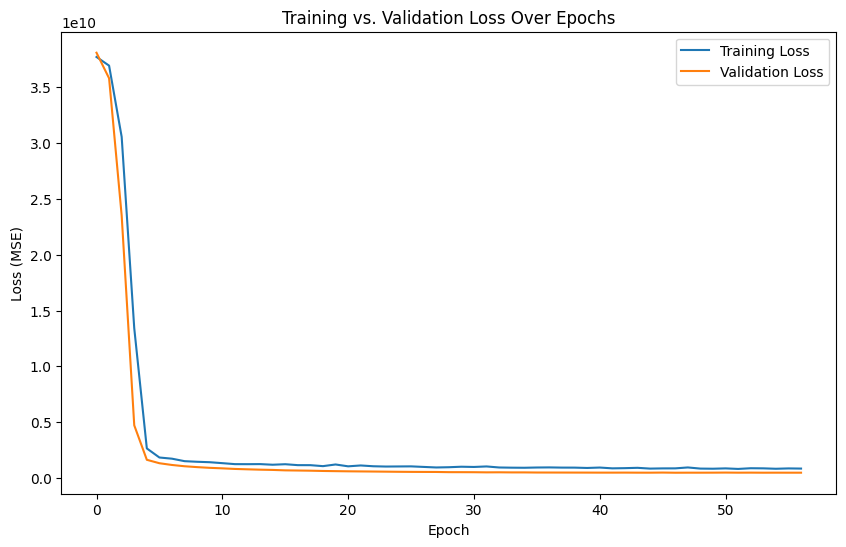

In [43]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_processed, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs. Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


**1. Evaluation Metrics**



*   **Test Loss (MSE):** 853,004,672.0 The Mean Squared Error (MSE) is a measure of the average squared difference between the predicted and actual sale prices. In this case, an MSE of about 853 million indicates that, on average, the squared errors are quite large. Taking the square root gives us the Root Mean Squared Error (RMSE), which would be around 29,200. This RMSE tells you that, on average, the model's predictions are off by approximately $29,200.

*   **Test MAE:** 16,349.93 The Mean Absolute Error (MAE) provides the average absolute difference between the predictions and the actual values. An MAE of around $16,350 means that on average, your model's sale price predictions deviate from the true values by that amount.

**Comments:**


*   Whether these error magnitudes are acceptable depends on the context—if the average home sale price is in the range of $200,000, then an MAE of $16.35k represents roughly an 8% error, which might be tolerable for some applications.

*   However, if the goal is to make very precise predictions, further improvements might be necessary.












2. **Training vs. Validation Loss Plot**



*   **Rapid Decline and Plateau**: The plot shows that both the training and validation loss decreased rapidly in the initial epochs. This means that the model quickly learned the basic patterns in the data. After this initial drop, the loss curves plateau, suggesting that the model has reached a point of convergence where further training does not yield significant gains.

*  **Alignment Between Training and Validation Loss**: The training and validation losses appear to track closely. This is a positive sign—it indicates that the model is not overfitting. Overfitting would typically manifest as a training loss that continues to decrease while the validation loss either stagnates or increases. In this case, since both curves are similar, the data split appears to be effective, and the model is generalizing reasonably well.


**Comments:**



*   **Convergence:** The plateau in both curves suggests that, with the current network architecture and hyperparameters, the model has essentially converged.

*   **Limited Reduction in Loss:** While the stability of the loss is good, the fact that the losses plateau at relatively high values suggests there might be room for improvement. This might involve exploring more complex architectures, better feature engineering, or even ensemble approaches.





**Summary**

**Overall Performance:** The model converged as evidenced by similar training and validation loss curves, yet it yields an MSE corresponding to an RMSE of roughly $29,200 and an MAE of about $16,350. These numbers provide a baseline performance.

**Areas for Improvement:** Although there are no glaring signs of overfitting, the error levels suggest there is still scope to improve the model. Future efforts might focus on refined feature engineering, deeper or more tailored architectures, and systematic hyperparameter tuning.